In [1]:
'''
https://www.kaggle.com/code/gunesevitan/rsna-2024-lsdc-eda
'''

'\nhttps://www.kaggle.com/code/gunesevitan/rsna-2024-lsdc-eda\n'

In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [118]:
from glob import glob
from tqdm import tqdm
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

competition_dataset_directory = Path('spine')

In [6]:
train_images=glob(str(competition_dataset_directory / 'train_images' / '*' / '*' / '*.dcm'))
train_images

['spine\\train_images\\100206310\\1012284084\\1.dcm',
 'spine\\train_images\\100206310\\1012284084\\10.dcm',
 'spine\\train_images\\100206310\\1012284084\\11.dcm',
 'spine\\train_images\\100206310\\1012284084\\12.dcm',
 'spine\\train_images\\100206310\\1012284084\\13.dcm',
 'spine\\train_images\\100206310\\1012284084\\14.dcm',
 'spine\\train_images\\100206310\\1012284084\\15.dcm',
 'spine\\train_images\\100206310\\1012284084\\16.dcm',
 'spine\\train_images\\100206310\\1012284084\\17.dcm',
 'spine\\train_images\\100206310\\1012284084\\18.dcm',
 'spine\\train_images\\100206310\\1012284084\\19.dcm',
 'spine\\train_images\\100206310\\1012284084\\2.dcm',
 'spine\\train_images\\100206310\\1012284084\\20.dcm',
 'spine\\train_images\\100206310\\1012284084\\21.dcm',
 'spine\\train_images\\100206310\\1012284084\\22.dcm',
 'spine\\train_images\\100206310\\1012284084\\23.dcm',
 'spine\\train_images\\100206310\\1012284084\\24.dcm',
 'spine\\train_images\\100206310\\1012284084\\25.dcm',
 'spine\\tra

In [11]:
df_train = pd.read_csv(competition_dataset_directory / 'train.csv')
df_train

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,left_neural_foraminal_narrowing_l5_s1,right_neural_foraminal_narrowing_l1_l2,right_neural_foraminal_narrowing_l2_l3,right_neural_foraminal_narrowing_l3_l4,right_neural_foraminal_narrowing_l4_l5,right_neural_foraminal_narrowing_l5_s1,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild
2,7143189,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,8785691,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,10728036,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,4282019580,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate
1971,4283570761,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1972,4284048608,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild
1973,4287160193,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild


In [15]:
df_train_series_descriptions = pd.read_csv(competition_dataset_directory / 'train_series_descriptions.csv')
df_train_series_descriptions

,study_id,series_id,series_description
0,4003253,702807833,Sagittal T2/STIR
1,4003253,1054713880,Sagittal T1
2,4003253,2448190387,Axial T2
3,4646740,3201256954,Axial T2
4,4646740,3486248476,Sagittal T1
...,...,...,...
6289,4287160193,1507070277,Sagittal T2/STIR
6290,4287160193,1820446240,Axial T2
6291,4290709089,3274612423,Sagittal T2/STIR
6292,4290709089,3390218084,Axial T2


In [16]:
df_train_label_coordinates = pd.read_csv(competition_dataset_directory / 'train_label_coordinates.csv')
df_train_label_coordinates

,study_id,series_id,instance_number,condition,level,x,y
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602
...,...,...,...,...,...,...,...
48687,4290709089,4237840455,11,Left Neural Foraminal Narrowing,L1/L2,219.465940,97.831063
48688,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L2/L3,205.340599,140.207084
48689,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L3/L4,202.724796,181.013624
48690,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L4/L5,202.933333,219.733333


In [17]:
print(f'Training Images Count {len(train_images)}')
print(f'Training Set Shape: {df_train.shape}')
print(f'Train Series Descriptions Shape: {df_train_series_descriptions.shape}')
print(f'Train Label Coordinates Shape: {df_train_label_coordinates.shape}')

Training Images Count 147218
Training Set Shape: (1975, 26)
Train Series Descriptions Shape: (6294, 3)
Train Label Coordinates Shape: (48692, 7)


In [20]:
'''
개요
문제는 아래 척추의 퇴행성 상태를 다섯 가지로 분류하는 것입니다. 
척추관 협착증, 내측 협착증, 관절하 협착증의 세 가지 핵심 조건이 있습니다. 
그중 마지막 두 가지는 척추의 각 면별로 고려되기 때문에 
좌측 신경 내부 협착증, 우측 신경 내부 협착증, 좌측 관절하 협착증, 우측 관절하 협착증, 척추관 협착증이 그 대상입니다. 
데이터 세트의 각 영상 연구에는 디스크 레벨 L1/L2, L2/L3, L3/L4, L4/L5, L5/S1에서 
이 다섯 가지 조건 각각에 대해 주어진 세 가지 심각도 점수(Normal/Mild, Moderate, Serve)가 있습니다.

디스크 레벨은 추간판이 위치한 요추의 특정 부위를 말합니다.

L1/L2 : 제1요추(L1)와 제2요추(L2) 사이의 디스크
L2/L3: 두 번째(L2)와 세 번째(L3) 요추 사이의 디스크
L3/L4: 제3요추(L3)와 제4요추(L4) 사이의 디스크
L4/L5: 제4 요추(L4)와 제5 요추(L5) 사이의 디스크
L5/S1 : 제5요추(L5)와 제1천골(S1) 사이의 디스크
이러한 수준은 척추 문제를 평가하고 분류하는 위치를 나타냅니다. 척추의 해부학은 아래에서 확인할 수 있습니다.
'''

'\n개요\n문제는 아래 척추의 퇴행성 상태를 다섯 가지로 분류하는 것입니다. \n척추관 협착증, 내측 협착증, 관절하 협착증의 세 가지 핵심 조건이 있습니다. \n그중 마지막 두 가지는 척추의 각 면별로 고려되기 때문에 \n좌측 신경 내부 협착증, 우측 신경 내부 협착증, 좌측 관절하 협착증, 우측 관절하 협착증, 척추관 협착증이 그 대상입니다. \n데이터 세트의 각 영상 연구에는 디스크 레벨 L1/L2, L2/L3, L3/L4, L4/L5, L5/S1에서 \n이 다섯 가지 조건 각각에 대해 주어진 세 가지 심각도 점수(Normal/Mild, Moderate, Serve)가 있습니다.\n\n디스크 레벨은 추간판이 위치한 요추의 특정 부위를 말합니다.\n\nL1/L2 : 제1요추(L1)와 제2요추(L2) 사이의 디스크\nL2/L3: 두 번째(L2)와 세 번째(L3) 요추 사이의 디스크\nL3/L4: 제3요추(L3)와 제4요추(L4) 사이의 디스크\nL4/L5: 제4 요추(L4)와 제5 요추(L5) 사이의 디스크\nL5/S1 : 제5요추(L5)와 제1천골(S1) 사이의 디스크\n이러한 수준은 척추 문제를 평가하고 분류하는 위치를 나타냅니다. 척추의 해부학은 아래에서 확인할 수 있습니다.\n'

In [21]:
df_train

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,left_neural_foraminal_narrowing_l5_s1,right_neural_foraminal_narrowing_l1_l2,right_neural_foraminal_narrowing_l2_l3,right_neural_foraminal_narrowing_l3_l4,right_neural_foraminal_narrowing_l4_l5,right_neural_foraminal_narrowing_l5_s1,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild
2,7143189,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,8785691,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,10728036,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,4282019580,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate
1971,4283570761,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1972,4284048608,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild
1973,4287160193,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild


In [22]:
'''
조건
이미 언급했듯이 데이터셋에는 세 가지 조건이 존재합니다. 
수준 간 분포가 다를 수 있으므로 함께 분석해야 합니다.
'''

'\n조건\n이미 언급했듯이 데이터셋에는 세 가지 조건이 존재합니다. \n수준 간 분포가 다를 수 있으므로 함께 분석해야 합니다.\n'

In [115]:
def visualize_condition_counts(df, title, path=None):
    """
    train 세트의 상태 수 시각화

    매개변수
    ----------
    df: panda.DataFrame
        Counts and percentages of conditions

    title : str
        Title of the plot

    path: str, pathlib.path or none
        출력 파일의 경로(path is None인 경우 선택한 백엔드와 함께 플롯이 표시됨)
    """
    
    y = np.arange(df.shape[0] // 3)

    fig = go.Figure()

    fig.add_trace(go.Bar(
        y=y - 3,
        x=df['count'].values[0::3],
        orientation='h',
        name='Normal/Mild',
        marker=dict(color='blue'),
        text=[
            f'Normal Count: {normal_count} ({normal_percentage:.2f}%)' 
            for normal_count, normal_percentage in zip(df['count'].values[0::3], df['percentage'].values[0::3])
        ],
        hoverinfo='text'
    ))

    fig.add_trace(go.Bar(
        y=y,
        x=df['count'].values[1::3],
        orientation='h',
        name='Moderate',
        marker=dict(color='orange'),
        text=[
            f'Moderate Count: {moderate_count} ({moderate_percentage:.2f}%)'
            for moderate_count, moderate_percentage in zip(df['count'].values[1::3], df['percentage'].values[1::3])
        ],
        hoverinfo='text'
    ))

    fig.add_trace(go.Bar(
        y=y + 3,
        x=df['count'].values[2::3],
        orientation='h',
        name='Severe',
        marker=dict(color='red'),
        text=[
            f'Severe Count: {severe_count} ({severe_percentage:.2f}%)'
            for severe_count, severe_percentage in zip(df['count'].values[2::3], df['percentage'].values[2::3])
        ],
        hoverinfo='text'
    ))

    fig.update_layout(
        title=title,
        barmode='overlay',
        yaxis=dict(
            tickvals=y,
            ticktext=[
                f'{level}<br>Normal Count: {normal_count} ({normal_percentage:.2f}%)<br>Moderate Count: {moderate_count} ({moderate_percentage:.2f}%)<br>Severe Count: {severe_count} ({severe_percentage:.2f}%)' 
                for level, normal_count, normal_percentage, moderate_count, moderate_percentage, severe_count, severe_percentage in zip(
                    df['level'].values[0::3],
                    df['count'].values[0::3],
                    df['percentage'].values[0::3],
                    df['count'].values[1::3],
                    df['percentage'].values[1::3],
                    df['count'].values[2::3],
                    df['percentage'].values[2::3]
                )
            ],
            title=title
        ),
        xaxis=dict(title='Count'),
        width=600,
        height=400,
        legend=dict(font=dict(size=18))
    )

    if path is None:
        fig.show()
    else:
        fig.write_image(path)

In [27]:
'''
Spinal Canal Stenosis(척추관 협착증)

척추관은 척추의 각 부분을 관통하며 척추를 수용하는 통로입니다. 
척추관 내 공간이 좁아지면 척추와 그로부터 갈라지는 신경근을 압박할 수 있습니다. 
이렇게 좁아지면 척추나 신경을 자극하거나 압박하거나 꼬집어 허리 통증과 좌골신경통 등 
신경과 관련된 문제가 발생할 수 있습니다. 척추관이 좁아지는 이유는 다양한 질환과 부상 때문입니다. 
척추관 협착증은 누구에게나 발생할 수 있지만 50세 이상에서 가장 흔히 발생합니다.

상태는 일반적으로 척추의 두 영역에 영향을 미칩니다:

요추(요추협착증) : 요추에는 5개의 척추뼈가 있어 요추에서 가장 큰 L1~L5로 표시되어 있습니다
목(cervical spinal stenosis) : 경추는 목에 7개의 척추뼈가 있으며, C1~C7로 표시되어 있습니다
흔하지는 않지만 척추 협착증의 영향을 받을 수 있는 것이 중간 등(흉추)입니다.
'''

'\nSpinal Canal Stenosis(척추관 협착증)\n\n척추관은 척추의 각 부분을 관통하며 척추를 수용하는 통로입니다. \n척추관 내 공간이 좁아지면 척추와 그로부터 갈라지는 신경근을 압박할 수 있습니다. \n이렇게 좁아지면 척추나 신경을 자극하거나 압박하거나 꼬집어 허리 통증과 좌골신경통 등 \n신경과 관련된 문제가 발생할 수 있습니다. 척추관이 좁아지는 이유는 다양한 질환과 부상 때문입니다. \n척추관 협착증은 누구에게나 발생할 수 있지만 50세 이상에서 가장 흔히 발생합니다.\n\n상태는 일반적으로 척추의 두 영역에 영향을 미칩니다:\n\n요추(요추협착증) : 요추에는 5개의 척추뼈가 있어 요추에서 가장 큰 L1~L5로 표시되어 있습니다\n목(cervical spinal stenosis) : 경추는 목에 7개의 척추뼈가 있으며, C1~C7로 표시되어 있습니다\n흔하지는 않지만 척추 협착증의 영향을 받을 수 있는 것이 중간 등(흉추)입니다.\n'

In [34]:
spinal_canal_stenosis_columns = [column for column in df_train.columns if column.startswith('spinal_canal_stenosis')]
spinal_canal_stenosis_columns

['spinal_canal_stenosis_l1_l2',
 'spinal_canal_stenosis_l2_l3',
 'spinal_canal_stenosis_l3_l4',
 'spinal_canal_stenosis_l4_l5',
 'spinal_canal_stenosis_l5_s1']

In [52]:
df_train_spinal_canal_stenosis = []

In [53]:
for column in spinal_canal_stenosis_columns:
    df = df_train[[column]].copy(deep=True)
    df['level'] = '_'.join(column.split('_')[-2:])
    df = df.rename(columns={column: 'spinal_canal_stenosis'})
    df_train_spinal_canal_stenosis.append(df)
    
df_train_spinal_canal_stenosis

[     spinal_canal_stenosis  level
 0              Normal/Mild  l1_l2
 1              Normal/Mild  l1_l2
 2              Normal/Mild  l1_l2
 3              Normal/Mild  l1_l2
 4              Normal/Mild  l1_l2
 ...                    ...    ...
 1970           Normal/Mild  l1_l2
 1971           Normal/Mild  l1_l2
 1972           Normal/Mild  l1_l2
 1973           Normal/Mild  l1_l2
 1974           Normal/Mild  l1_l2
 
 [1975 rows x 2 columns],
      spinal_canal_stenosis  level
 0              Normal/Mild  l2_l3
 1              Normal/Mild  l2_l3
 2              Normal/Mild  l2_l3
 3              Normal/Mild  l2_l3
 4              Normal/Mild  l2_l3
 ...                    ...    ...
 1970           Normal/Mild  l2_l3
 1971           Normal/Mild  l2_l3
 1972           Normal/Mild  l2_l3
 1973              Moderate  l2_l3
 1974           Normal/Mild  l2_l3
 
 [1975 rows x 2 columns],
      spinal_canal_stenosis  level
 0              Normal/Mild  l3_l4
 1                 Moderate  l3_l4

In [54]:
df_train_spinal_canal_stenosis = pd.concat(df_train_spinal_canal_stenosis, axis=0).reset_index(drop=True)
df_train_spinal_canal_stenosis

,spinal_canal_stenosis,level
0,Normal/Mild,l1_l2
1,Normal/Mild,l1_l2
2,Normal/Mild,l1_l2
3,Normal/Mild,l1_l2
4,Normal/Mild,l1_l2
...,...,...
9870,Normal/Mild,l5_s1
9871,Normal/Mild,l5_s1
9872,Normal/Mild,l5_s1
9873,Normal/Mild,l5_s1


In [58]:
df_train_spinal_canal_stenosis_counts = df_train_spinal_canal_stenosis.value_counts().reset_index()
df_train_spinal_canal_stenosis_counts

,spinal_canal_stenosis,level,count
0,Normal/Mild,l5_s1,1904
1,Normal/Mild,l1_l2,1886
2,Normal/Mild,l2_l3,1770
3,Normal/Mild,l3_l4,1622
4,Normal/Mild,l4_l5,1482
5,Severe,l4_l5,255
6,Moderate,l4_l5,237
7,Moderate,l3_l4,230
8,Moderate,l2_l3,151
9,Severe,l3_l4,122


In [60]:
df_train_spinal_canal_stenosis_counts['severity'] = df_train_spinal_canal_stenosis_counts['spinal_canal_stenosis'].map({
    'Normal/Mild': 0,
    'Moderate': 1,
    'Severe': 2
})
df_train_spinal_canal_stenosis_counts

,spinal_canal_stenosis,level,count,severity
0,Normal/Mild,l5_s1,1904,0
1,Normal/Mild,l1_l2,1886,0
2,Normal/Mild,l2_l3,1770,0
3,Normal/Mild,l3_l4,1622,0
4,Normal/Mild,l4_l5,1482,0
5,Severe,l4_l5,255,2
6,Moderate,l4_l5,237,1
7,Moderate,l3_l4,230,1
8,Moderate,l2_l3,151,1
9,Severe,l3_l4,122,2


In [63]:
df_train_spinal_canal_stenosis_counts = df_train_spinal_canal_stenosis_counts.sort_values(by=['level', 'severity'], ascending=True)
df_train_spinal_canal_stenosis_counts 

,spinal_canal_stenosis,level,count,severity
1,Normal/Mild,l1_l2,1886,0
10,Moderate,l1_l2,67,1
13,Severe,l1_l2,21,2
2,Normal/Mild,l2_l3,1770,0
8,Moderate,l2_l3,151,1
11,Severe,l2_l3,53,2
3,Normal/Mild,l3_l4,1622,0
7,Moderate,l3_l4,230,1
9,Severe,l3_l4,122,2
4,Normal/Mild,l4_l5,1482,0


In [66]:
df_train_spinal_canal_stenosis_counts['percentage'] = df_train_spinal_canal_stenosis_counts['count'] / df_train_spinal_canal_stenosis_counts.groupby('level')['count'].transform('sum') * 100
df_train_spinal_canal_stenosis_counts 

,spinal_canal_stenosis,level,count,severity,percentage
1,Normal/Mild,l1_l2,1886,0,95.542047
10,Moderate,l1_l2,67,1,3.394124
13,Severe,l1_l2,21,2,1.063830
2,Normal/Mild,l2_l3,1770,0,89.665653
8,Moderate,l2_l3,151,1,7.649443
11,Severe,l2_l3,53,2,2.684904
3,Normal/Mild,l3_l4,1622,0,82.168186
7,Moderate,l3_l4,230,1,11.651469
9,Severe,l3_l4,122,2,6.180344
4,Normal/Mild,l4_l5,1482,0,75.075988


In [68]:
'''
다양한 수준 내에서 척추관 협착증의 중증도는 아래에 시각화되어 있습니다. 
moderate 및 severe 수치가 L5/S1 수치에 도달할 때까지 지속적으로 증가하기 때문에 
이 상태는 낮은 수치에서 더 흔합니다. L5/S1 수치는 moderate 및 severe 수치가 가장 낮은 반면 
L4/L5 레벨은 moderate 수치보다 severe 수치가 더 높은 유일한 레벨입니다.
'''

'\n다양한 수준 내에서 척추관 협착증의 중증도는 아래에 시각화되어 있습니다. \nmoderate 및 severe 수치가 L5/S1 수치에 도달할 때까지 지속적으로 증가하기 때문에 \n이 상태는 낮은 수치에서 더 흔합니다. L5/S1 수치는 moderate 및 severe 수치가 가장 낮은 반면 \nL4/L5 레벨은 moderate 수치보다 severe 수치가 더 높은 유일한 레벨입니다.\n'

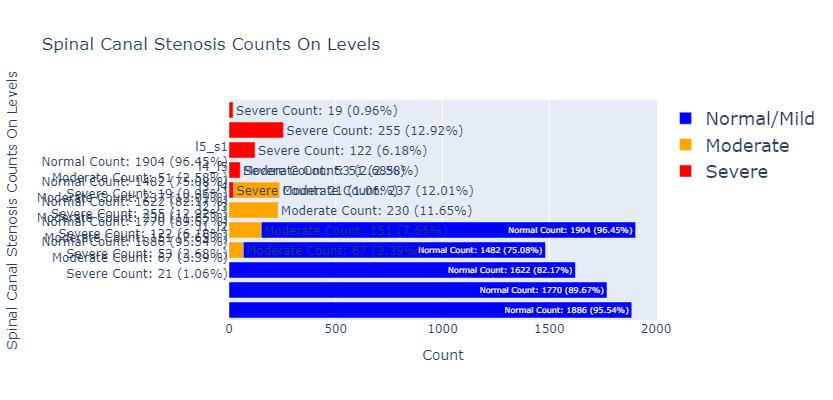

In [116]:
visualize_condition_counts(
    df=df_train_spinal_canal_stenosis_counts,
    title='Spinal Canal Stenosis Counts On Levels'
)

In [321]:
def visualize_counts(df, disease_name, plotly_title):
    color_map = {
    'Normal/Mild': 'blue',
    'Moderate': 'orange',
    'Severe': 'red'
    }

    # 막대 그래프 생성
    fig = px.bar(
        df, x='count', y=disease_name, 
        color=disease_name,  # 색상 기준을 spinal_canal_stenosis로 설정
        facet_row='level',  # 각 level에 대해 가로로 정렬
        color_discrete_map=color_map,  # `spinal_canal_stenosis`에 따라 색상 매핑
        labels={'count':'Count', disease_name:''},
        title=plotly_title
    )

    # 그래프 레이아웃 조정
    fig.update_layout(barmode='group',
                  legend=dict(
                    orientation="h",  # 범례를 수평으로 배치
                    yanchor="top",  # 범례의 기준을 상단에 맞춤
                    y=-0.2,  # Y축 위치 조정 (그래프의 아래쪽)
                    xanchor="center",  # 범례의 기준을 가운데에 맞춤
                    x=0.5)  # X축 위치 조정 (그래프의 가운데) 
                  ,title={
                    'x': 0.5,  # 제목을 그래프의 가로 중앙으로 설정
                    'xanchor': 'center',  # 제목을 중앙에 맞춤
                    'y': 0.95,  # 제목의 세로 위치 (그래프의 상단과 가까운 위치)
                    'yanchor': 'top',  # 제목의 상단을 기준으로 설정
                    'pad': {'b': 20}  # 제목과 그래프 사이의 거리 설정 (아래쪽 마진)
                  },
                  yaxis_title=''
    )


    fig.show()

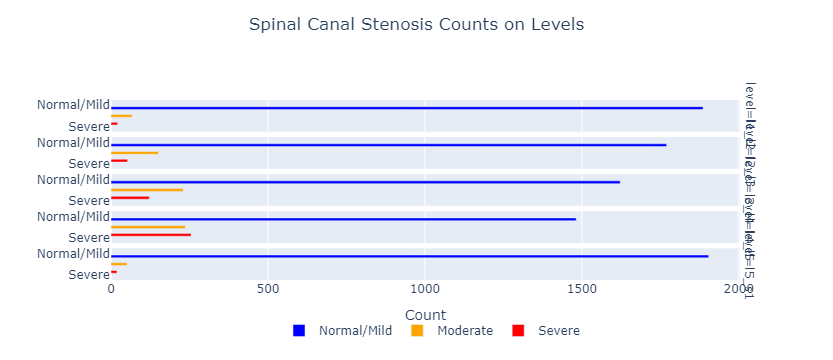

In [322]:
visualize_counts(df_train_spinal_canal_stenosis_counts, 'spinal_canal_stenosis', 'Spinal Canal Stenosis Counts on Levels')

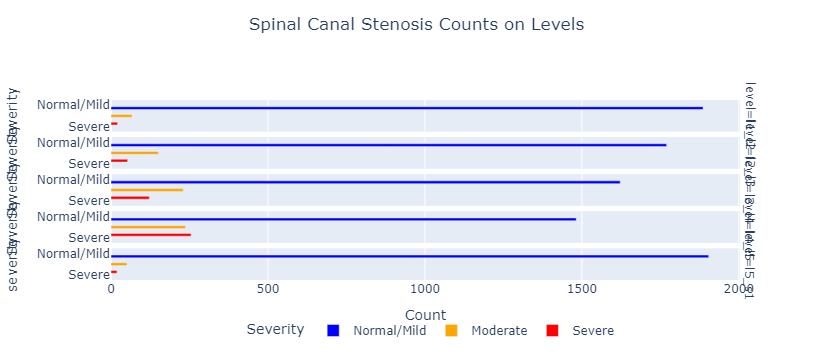

In [143]:
color_map = {
    'Normal/Mild': 'blue',
    'Moderate': 'orange',
    'Severe': 'red'
}

# 막대 그래프 생성
fig = px.bar(
    df_train_spinal_canal_stenosis_counts, 
    x='count', 
    y='spinal_canal_stenosis', 
    color='spinal_canal_stenosis',  # 색상 기준을 spinal_canal_stenosis로 설정
    facet_row='level',  # 각 level에 대해 가로로 정렬
    color_discrete_map=color_map,  # `spinal_canal_stenosis`에 따라 색상 매핑
    labels={'count':'Count', 'spinal_canal_stenosis':'Severity'},
    title='Spinal Canal Stenosis Counts on Levels'
)

# 그래프 레이아웃 조정
fig.update_layout(barmode='group',
                  legend=dict(
                    orientation="h",  # 범례를 수평으로 배치
                    yanchor="top",  # 범례의 기준을 상단에 맞춤
                    y=-0.2,  # Y축 위치 조정 (그래프의 아래쪽)
                    xanchor="center",  # 범례의 기준을 가운데에 맞춤
                    x=0.5)  # X축 위치 조정 (그래프의 가운데) 
                  ,title={
                    'x': 0.5,  # 제목을 그래프의 가로 중앙으로 설정
                    'xanchor': 'center',  # 제목을 중앙에 맞춤
                    'y': 0.95,  # 제목의 세로 위치 (그래프의 상단과 가까운 위치)
                    'yanchor': 'top',  # 제목의 상단을 기준으로 설정
                    'pad': {'b': 20}  # 제목과 그래프 사이의 거리 설정 (아래쪽 마진)
                  },
                  yaxis_title='severity'
)


fig.show()

In [144]:
'''
Neural Foraminal Narrowing(추간공협착증)
유공충 협착은 척수를 빠져나가는 신경 주변의 특정 부위에 생기는 협착입니다. 
척추 양쪽에 뚫린 구멍인 신경 구멍에 영향을 미치는 일종의 척추 협착증입니다. 
유공충 협착증은 영향을 받는 신경에 압력을 가하고, 결국 신경을 통과하는 신호에 영향을 미쳐 
신경 통증을 유발하고 영구적인 신경 손상을 일으킬 수 있습니다.

신경 구멍은 척추 신경이 척추를 빠져나와 몸의 다른 부분으로 뻗어 나가는 구멍입니다. 
구멍의 크기는 척추의 위치에 따라 다릅니다. 구멍 협착의 위치는 구멍의 종류를 결정합니다:

경추(목) : 두 번째로 흔한 포르말린 협착 부위입니다
흉추(상, 중등)
요추(허리) : 요추 협착 부위 중 가장 흔한 부위입니다
천골 척추 (허리와 골반이 훨씬 아래쪽)
콕시겔라 척추 (꼬리뼈)
유공충 협착은 특히 55세 이상에서 흔히 나타나며, 
나이가 들수록 발병 가능성이 높아집니다. 60세가 되면 요추에 적어도 40% 정도의 유공충 협착이 생기고, 
80세 이상에서는 약 75%까지 증가한다는 연구 결과도 있습니다. 
하지만 유공충 협착이 있는 사람은 심하더라도 대부분 자신이 가지고 있는 것을 인지하지 못하고 있습니다. 
유공충 협착이 심한 사람은 17.5%만 증상을 경험합니다.
'''

'\nNeural Foraminal Narrowing(추간공협착증)\n유공충 협착은 척수를 빠져나가는 신경 주변의 특정 부위에 생기는 협착입니다. \n척추 양쪽에 뚫린 구멍인 신경 구멍에 영향을 미치는 일종의 척추 협착증입니다. \n유공충 협착증은 영향을 받는 신경에 압력을 가하고, 결국 신경을 통과하는 신호에 영향을 미쳐 \n신경 통증을 유발하고 영구적인 신경 손상을 일으킬 수 있습니다.\n\n신경 구멍은 척추 신경이 척추를 빠져나와 몸의 다른 부분으로 뻗어 나가는 구멍입니다. \n구멍의 크기는 척추의 위치에 따라 다릅니다. 구멍 협착의 위치는 구멍의 종류를 결정합니다:\n\n경추(목) : 두 번째로 흔한 포르말린 협착 부위입니다\n흉추(상, 중등)\n요추(허리) : 요추 협착 부위 중 가장 흔한 부위입니다\n천골 척추 (허리와 골반이 훨씬 아래쪽)\n콕시겔라 척추 (꼬리뼈)\n유공충 협착은 특히 55세 이상에서 흔히 나타나며, \n나이가 들수록 발병 가능성이 높아집니다. 60세가 되면 요추에 적어도 40% 정도의 유공충 협착이 생기고, \n80세 이상에서는 약 75%까지 증가한다는 연구 결과도 있습니다. \n하지만 유공충 협착이 있는 사람은 심하더라도 대부분 자신이 가지고 있는 것을 인지하지 못하고 있습니다. \n유공충 협착이 심한 사람은 17.5%만 증상을 경험합니다.\n'

In [146]:
neural_foraminal_narrowing_columns = [column for column in df_train.columns if 'neural_foraminal_narrowing' in column]
neural_foraminal_narrowing_columns

['left_neural_foraminal_narrowing_l1_l2',
 'left_neural_foraminal_narrowing_l2_l3',
 'left_neural_foraminal_narrowing_l3_l4',
 'left_neural_foraminal_narrowing_l4_l5',
 'left_neural_foraminal_narrowing_l5_s1',
 'right_neural_foraminal_narrowing_l1_l2',
 'right_neural_foraminal_narrowing_l2_l3',
 'right_neural_foraminal_narrowing_l3_l4',
 'right_neural_foraminal_narrowing_l4_l5',
 'right_neural_foraminal_narrowing_l5_s1']

In [152]:
df_train_neural_foraminal_narrowing = []

In [153]:
for column in neural_foraminal_narrowing_columns:
    df = df_train[[column]].copy(deep=True)
    df['level'] = '_'.join(column.split('_')[-2:])
    df = df.rename(columns={column: 'neural_foraminal_narrowing'})
    df_train_neural_foraminal_narrowing.append(df)

In [154]:
df_train_neural_foraminal_narrowing

[     neural_foraminal_narrowing  level
 0                   Normal/Mild  l1_l2
 1                   Normal/Mild  l1_l2
 2                   Normal/Mild  l1_l2
 3                   Normal/Mild  l1_l2
 4                   Normal/Mild  l1_l2
 ...                         ...    ...
 1970                Normal/Mild  l1_l2
 1971                Normal/Mild  l1_l2
 1972                Normal/Mild  l1_l2
 1973                Normal/Mild  l1_l2
 1974                Normal/Mild  l1_l2
 
 [1975 rows x 2 columns],
      neural_foraminal_narrowing  level
 0                   Normal/Mild  l2_l3
 1                   Normal/Mild  l2_l3
 2                   Normal/Mild  l2_l3
 3                   Normal/Mild  l2_l3
 4                   Normal/Mild  l2_l3
 ...                         ...    ...
 1970                Normal/Mild  l2_l3
 1971                Normal/Mild  l2_l3
 1972                Normal/Mild  l2_l3
 1973                Normal/Mild  l2_l3
 1974                Normal/Mild  l2_l3
 
 [1975 row

In [155]:
df_train_neural_foraminal_narrowing = pd.concat(df_train_neural_foraminal_narrowing, axis=0).reset_index(drop=True)
df_train_neural_foraminal_narrowing

,neural_foraminal_narrowing,level
0,Normal/Mild,l1_l2
1,Normal/Mild,l1_l2
2,Normal/Mild,l1_l2
3,Normal/Mild,l1_l2
4,Normal/Mild,l1_l2
...,...,...
19745,Severe,l5_s1
19746,Normal/Mild,l5_s1
19747,Normal/Mild,l5_s1
19748,Normal/Mild,l5_s1


In [156]:
df_train_neural_foraminal_narrowing_counts = df_train_neural_foraminal_narrowing.groupby('level').value_counts().reset_index()
df_train_neural_foraminal_narrowing_counts

,level,neural_foraminal_narrowing,count
0,l1_l2,Normal/Mild,3799
1,l1_l2,Moderate,126
2,l1_l2,Severe,15
3,l2_l3,Normal/Mild,3584
4,l2_l3,Moderate,339
5,l2_l3,Severe,17
6,l3_l4,Normal/Mild,3034
7,l3_l4,Moderate,825
8,l3_l4,Severe,81
9,l4_l5,Normal/Mild,2412


In [158]:
df_train_neural_foraminal_narrowing_counts['severity'] = df_train_neural_foraminal_narrowing_counts['neural_foraminal_narrowing'].map({
    'Normal/Mild': 0,
    'Moderate': 1,
    'Severe': 2
})
df_train_neural_foraminal_narrowing_counts

,level,neural_foraminal_narrowing,count,severity
0,l1_l2,Normal/Mild,3799,0
1,l1_l2,Moderate,126,1
2,l1_l2,Severe,15,2
3,l2_l3,Normal/Mild,3584,0
4,l2_l3,Moderate,339,1
5,l2_l3,Severe,17,2
6,l3_l4,Normal/Mild,3034,0
7,l3_l4,Moderate,825,1
8,l3_l4,Severe,81,2
9,l4_l5,Normal/Mild,2412,0


In [160]:
df_train_neural_foraminal_narrowing_counts = df_train_neural_foraminal_narrowing_counts.sort_values(by=['level', 'severity'], ascending=True)
df_train_neural_foraminal_narrowing_counts

,level,neural_foraminal_narrowing,count,severity
0,l1_l2,Normal/Mild,3799,0
1,l1_l2,Moderate,126,1
2,l1_l2,Severe,15,2
3,l2_l3,Normal/Mild,3584,0
4,l2_l3,Moderate,339,1
5,l2_l3,Severe,17,2
6,l3_l4,Normal/Mild,3034,0
7,l3_l4,Moderate,825,1
8,l3_l4,Severe,81,2
9,l4_l5,Normal/Mild,2412,0


In [161]:
df_train_neural_foraminal_narrowing_counts['percentage'] = df_train_neural_foraminal_narrowing_counts['count'] / df_train_neural_foraminal_narrowing_counts.groupby('level')['count'].transform('sum') * 100
df_train_neural_foraminal_narrowing_counts

,level,neural_foraminal_narrowing,count,severity,percentage
0,l1_l2,Normal/Mild,3799,0,96.421320
1,l1_l2,Moderate,126,1,3.197970
2,l1_l2,Severe,15,2,0.380711
3,l2_l3,Normal/Mild,3584,0,90.964467
4,l2_l3,Moderate,339,1,8.604061
5,l2_l3,Severe,17,2,0.431472
6,l3_l4,Normal/Mild,3034,0,77.005076
7,l3_l4,Moderate,825,1,20.939086
8,l3_l4,Severe,81,2,2.055838
9,l4_l5,Normal/Mild,2412,0,61.218274


In [162]:
left_neural_foraminal_narrowing_columns = [column for column in df_train.columns if column.startswith('left_neural_foraminal_narrowing')]
left_neural_foraminal_narrowing_columns

['left_neural_foraminal_narrowing_l1_l2',
 'left_neural_foraminal_narrowing_l2_l3',
 'left_neural_foraminal_narrowing_l3_l4',
 'left_neural_foraminal_narrowing_l4_l5',
 'left_neural_foraminal_narrowing_l5_s1']

In [165]:
df_train_left_neural_foraminal_narrowing = []

In [166]:
for column in left_neural_foraminal_narrowing_columns:
    df = df_train[[column]].copy(deep=True)
    df['level'] = '_'.join(column.split('_')[-2:])
    df = df.rename(columns={column: 'left_neural_foraminal_narrowing'})
    df_train_left_neural_foraminal_narrowing.append(df)

df_train_left_neural_foraminal_narrowing

[     left_neural_foraminal_narrowing  level
 0                        Normal/Mild  l1_l2
 1                        Normal/Mild  l1_l2
 2                        Normal/Mild  l1_l2
 3                        Normal/Mild  l1_l2
 4                        Normal/Mild  l1_l2
 ...                              ...    ...
 1970                     Normal/Mild  l1_l2
 1971                     Normal/Mild  l1_l2
 1972                     Normal/Mild  l1_l2
 1973                     Normal/Mild  l1_l2
 1974                     Normal/Mild  l1_l2
 
 [1975 rows x 2 columns],
      left_neural_foraminal_narrowing  level
 0                        Normal/Mild  l2_l3
 1                        Normal/Mild  l2_l3
 2                        Normal/Mild  l2_l3
 3                        Normal/Mild  l2_l3
 4                        Normal/Mild  l2_l3
 ...                              ...    ...
 1970                     Normal/Mild  l2_l3
 1971                     Normal/Mild  l2_l3
 1972                     N

In [167]:
df_train_left_neural_foraminal_narrowing = pd.concat(df_train_left_neural_foraminal_narrowing, axis=0).reset_index(drop=True)
df_train_left_neural_foraminal_narrowing

,left_neural_foraminal_narrowing,level
0,Normal/Mild,l1_l2
1,Normal/Mild,l1_l2
2,Normal/Mild,l1_l2
3,Normal/Mild,l1_l2
4,Normal/Mild,l1_l2
...,...,...
9870,Moderate,l5_s1
9871,Normal/Mild,l5_s1
9872,Severe,l5_s1
9873,Normal/Mild,l5_s1


In [169]:
df_train_left_neural_foraminal_narrowing_counts = df_train_left_neural_foraminal_narrowing.groupby('level').value_counts().reset_index()
df_train_left_neural_foraminal_narrowing_counts

,level,left_neural_foraminal_narrowing,count
0,l1_l2,Normal/Mild,1908
1,l1_l2,Moderate,63
2,l1_l2,Severe,2
3,l2_l3,Normal/Mild,1791
4,l2_l3,Moderate,171
5,l2_l3,Severe,11
6,l3_l4,Normal/Mild,1522
7,l3_l4,Moderate,411
8,l3_l4,Severe,40
9,l4_l5,Normal/Mild,1204


In [170]:
df_train_left_neural_foraminal_narrowing_counts['severity'] = df_train_left_neural_foraminal_narrowing_counts['left_neural_foraminal_narrowing'].map({
    'Normal/Mild': 0,
    'Moderate': 1,
    'Severe': 2
})
df_train_left_neural_foraminal_narrowing_counts

,level,left_neural_foraminal_narrowing,count,severity
0,l1_l2,Normal/Mild,1908,0
1,l1_l2,Moderate,63,1
2,l1_l2,Severe,2,2
3,l2_l3,Normal/Mild,1791,0
4,l2_l3,Moderate,171,1
5,l2_l3,Severe,11,2
6,l3_l4,Normal/Mild,1522,0
7,l3_l4,Moderate,411,1
8,l3_l4,Severe,40,2
9,l4_l5,Normal/Mild,1204,0


In [171]:
df_train_left_neural_foraminal_narrowing_counts = df_train_left_neural_foraminal_narrowing_counts.sort_values(by=['level', 'severity'], ascending=True)
df_train_left_neural_foraminal_narrowing_counts

,level,left_neural_foraminal_narrowing,count,severity
0,l1_l2,Normal/Mild,1908,0
1,l1_l2,Moderate,63,1
2,l1_l2,Severe,2,2
3,l2_l3,Normal/Mild,1791,0
4,l2_l3,Moderate,171,1
5,l2_l3,Severe,11,2
6,l3_l4,Normal/Mild,1522,0
7,l3_l4,Moderate,411,1
8,l3_l4,Severe,40,2
9,l4_l5,Normal/Mild,1204,0


In [172]:
df_train_left_neural_foraminal_narrowing_counts['percentage'] = df_train_left_neural_foraminal_narrowing_counts['count'] / df_train_left_neural_foraminal_narrowing_counts.groupby('level')['count'].transform('sum') * 100
df_train_left_neural_foraminal_narrowing_counts

,level,left_neural_foraminal_narrowing,count,severity,percentage
0,l1_l2,Normal/Mild,1908,0,96.705525
1,l1_l2,Moderate,63,1,3.193107
2,l1_l2,Severe,2,2,0.101368
3,l2_l3,Normal/Mild,1791,0,90.775469
4,l2_l3,Moderate,171,1,8.667005
5,l2_l3,Severe,11,2,0.557527
6,l3_l4,Normal/Mild,1522,0,77.141409
7,l3_l4,Moderate,411,1,20.831221
8,l3_l4,Severe,40,2,2.027369
9,l4_l5,Normal/Mild,1204,0,61.023822


In [174]:
right_neural_foraminal_narrowing_columns = [column for column in df_train.columns if column.startswith('right_neural_foraminal_narrowing')]
right_neural_foraminal_narrowing_columns 

['right_neural_foraminal_narrowing_l1_l2',
 'right_neural_foraminal_narrowing_l2_l3',
 'right_neural_foraminal_narrowing_l3_l4',
 'right_neural_foraminal_narrowing_l4_l5',
 'right_neural_foraminal_narrowing_l5_s1']

In [175]:
df_train_right_neural_foraminal_narrowing = []
for column in right_neural_foraminal_narrowing_columns:
    df = df_train[[column]].copy(deep=True)
    df['level'] = '_'.join(column.split('_')[-2:])
    df = df.rename(columns={column: 'right_neural_foraminal_narrowing'})
    df_train_right_neural_foraminal_narrowing.append(df)

df_train_right_neural_foraminal_narrowing

[     right_neural_foraminal_narrowing  level
 0                         Normal/Mild  l1_l2
 1                         Normal/Mild  l1_l2
 2                         Normal/Mild  l1_l2
 3                         Normal/Mild  l1_l2
 4                         Normal/Mild  l1_l2
 ...                               ...    ...
 1970                      Normal/Mild  l1_l2
 1971                      Normal/Mild  l1_l2
 1972                      Normal/Mild  l1_l2
 1973                      Normal/Mild  l1_l2
 1974                      Normal/Mild  l1_l2
 
 [1975 rows x 2 columns],
      right_neural_foraminal_narrowing  level
 0                         Normal/Mild  l2_l3
 1                         Normal/Mild  l2_l3
 2                         Normal/Mild  l2_l3
 3                         Normal/Mild  l2_l3
 4                         Normal/Mild  l2_l3
 ...                               ...    ...
 1970                      Normal/Mild  l2_l3
 1971                      Normal/Mild  l2_l3
 1972 

In [176]:
df_train_right_neural_foraminal_narrowing = pd.concat(df_train_right_neural_foraminal_narrowing, axis=0).reset_index(drop=True)
df_train_right_neural_foraminal_narrowing

,right_neural_foraminal_narrowing,level
0,Normal/Mild,l1_l2
1,Normal/Mild,l1_l2
2,Normal/Mild,l1_l2
3,Normal/Mild,l1_l2
4,Normal/Mild,l1_l2
...,...,...
9870,Severe,l5_s1
9871,Normal/Mild,l5_s1
9872,Normal/Mild,l5_s1
9873,Normal/Mild,l5_s1


In [177]:
df_train_right_neural_foraminal_narrowing_counts = df_train_right_neural_foraminal_narrowing.groupby('level').value_counts().reset_index()
df_train_right_neural_foraminal_narrowing_counts

,level,right_neural_foraminal_narrowing,count
0,l1_l2,Normal/Mild,1891
1,l1_l2,Moderate,63
2,l1_l2,Severe,13
3,l2_l3,Normal/Mild,1793
4,l2_l3,Moderate,168
5,l2_l3,Severe,6
6,l3_l4,Normal/Mild,1512
7,l3_l4,Moderate,414
8,l3_l4,Severe,41
9,l4_l5,Normal/Mild,1208


In [178]:
df_train_right_neural_foraminal_narrowing_counts['severity'] = df_train_right_neural_foraminal_narrowing_counts['right_neural_foraminal_narrowing'].map({
    'Normal/Mild': 0,
    'Moderate': 1,
    'Severe': 2
})
df_train_right_neural_foraminal_narrowing_counts

,level,right_neural_foraminal_narrowing,count,severity
0,l1_l2,Normal/Mild,1891,0
1,l1_l2,Moderate,63,1
2,l1_l2,Severe,13,2
3,l2_l3,Normal/Mild,1793,0
4,l2_l3,Moderate,168,1
5,l2_l3,Severe,6,2
6,l3_l4,Normal/Mild,1512,0
7,l3_l4,Moderate,414,1
8,l3_l4,Severe,41,2
9,l4_l5,Normal/Mild,1208,0


In [179]:
df_train_right_neural_foraminal_narrowing_counts = df_train_right_neural_foraminal_narrowing_counts.sort_values(by=['level', 'severity'], ascending=True)
df_train_right_neural_foraminal_narrowing_counts

,level,right_neural_foraminal_narrowing,count,severity
0,l1_l2,Normal/Mild,1891,0
1,l1_l2,Moderate,63,1
2,l1_l2,Severe,13,2
3,l2_l3,Normal/Mild,1793,0
4,l2_l3,Moderate,168,1
5,l2_l3,Severe,6,2
6,l3_l4,Normal/Mild,1512,0
7,l3_l4,Moderate,414,1
8,l3_l4,Severe,41,2
9,l4_l5,Normal/Mild,1208,0


In [180]:
df_train_right_neural_foraminal_narrowing_counts['percentage'] = df_train_right_neural_foraminal_narrowing_counts['count'] / df_train_right_neural_foraminal_narrowing_counts.groupby('level')['count'].transform('sum') * 100
df_train_right_neural_foraminal_narrowing_counts

,level,right_neural_foraminal_narrowing,count,severity,percentage
0,l1_l2,Normal/Mild,1891,0,96.136248
1,l1_l2,Moderate,63,1,3.202847
2,l1_l2,Severe,13,2,0.660905
3,l2_l3,Normal/Mild,1793,0,91.154042
4,l2_l3,Moderate,168,1,8.540925
5,l2_l3,Severe,6,2,0.305033
6,l3_l4,Normal/Mild,1512,0,76.868327
7,l3_l4,Moderate,414,1,21.047280
8,l3_l4,Severe,41,2,2.084392
9,l4_l5,Normal/Mild,1208,0,61.413320


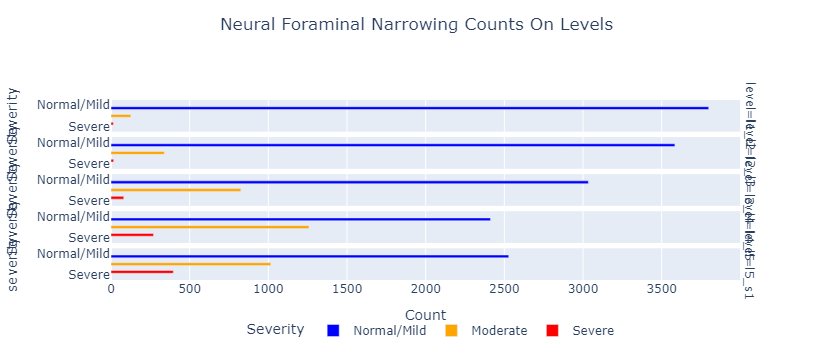

In [183]:
visualize_counts(
    df=df_train_neural_foraminal_narrowing_counts, 
    disease_name='neural_foraminal_narrowing', 
    plotly_title='Neural Foraminal Narrowing Counts On Levels')

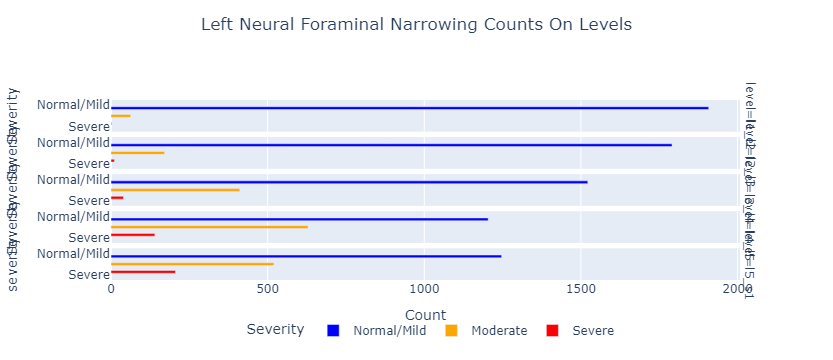

In [184]:
visualize_counts(
    df=df_train_left_neural_foraminal_narrowing_counts, 
    disease_name='left_neural_foraminal_narrowing', 
    plotly_title='Left Neural Foraminal Narrowing Counts On Levels')

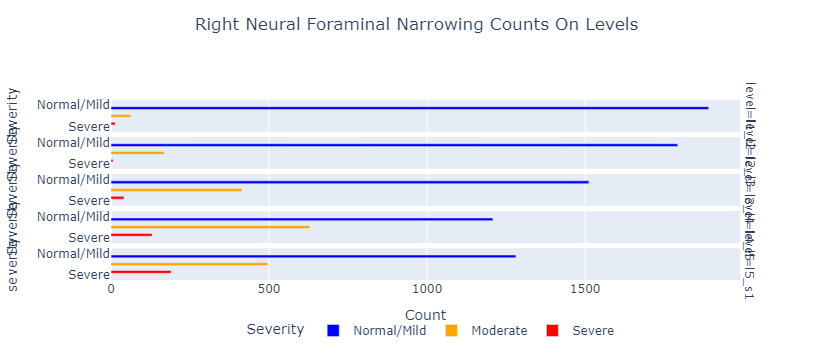

In [185]:
visualize_counts(
    df=df_train_right_neural_foraminal_narrowing_counts, 
    disease_name='right_neural_foraminal_narrowing', 
    plotly_title='Right Neural Foraminal Narrowing Counts On Levels')

In [186]:
neural_foraminal_narrowing_columns = [column for column in df_train.columns if 'neural_foraminal_narrowing' in column]
neural_foraminal_narrowing_columns

['left_neural_foraminal_narrowing_l1_l2',
 'left_neural_foraminal_narrowing_l2_l3',
 'left_neural_foraminal_narrowing_l3_l4',
 'left_neural_foraminal_narrowing_l4_l5',
 'left_neural_foraminal_narrowing_l5_s1',
 'right_neural_foraminal_narrowing_l1_l2',
 'right_neural_foraminal_narrowing_l2_l3',
 'right_neural_foraminal_narrowing_l3_l4',
 'right_neural_foraminal_narrowing_l4_l5',
 'right_neural_foraminal_narrowing_l5_s1']

In [187]:
df_train_left_right_neural_foraminal_narrowing = []

In [188]:
for column in neural_foraminal_narrowing_columns[:5]:
    df = df_train[[column]].copy(deep=True)
    df['level'] = '_'.join(column.split('_')[-2:])
    df = df.rename(columns={column: 'left_neural_foraminal_narrowing'})
    df_train_left_right_neural_foraminal_narrowing.append(df)

In [189]:
df_train_left_right_neural_foraminal_narrowing

[     left_neural_foraminal_narrowing  level
 0                        Normal/Mild  l1_l2
 1                        Normal/Mild  l1_l2
 2                        Normal/Mild  l1_l2
 3                        Normal/Mild  l1_l2
 4                        Normal/Mild  l1_l2
 ...                              ...    ...
 1970                     Normal/Mild  l1_l2
 1971                     Normal/Mild  l1_l2
 1972                     Normal/Mild  l1_l2
 1973                     Normal/Mild  l1_l2
 1974                     Normal/Mild  l1_l2
 
 [1975 rows x 2 columns],
      left_neural_foraminal_narrowing  level
 0                        Normal/Mild  l2_l3
 1                        Normal/Mild  l2_l3
 2                        Normal/Mild  l2_l3
 3                        Normal/Mild  l2_l3
 4                        Normal/Mild  l2_l3
 ...                              ...    ...
 1970                     Normal/Mild  l2_l3
 1971                     Normal/Mild  l2_l3
 1972                     N

In [190]:
for column in neural_foraminal_narrowing_columns[5:]:
    df = df_train[[column]].copy(deep=True)
    df['level'] = '_'.join(column.split('_')[-2:])
    df = df.rename(columns={column: 'right_neural_foraminal_narrowing'})
    df_train_left_right_neural_foraminal_narrowing.append(df)

In [191]:
df_train_left_right_neural_foraminal_narrowing

[     left_neural_foraminal_narrowing  level
 0                        Normal/Mild  l1_l2
 1                        Normal/Mild  l1_l2
 2                        Normal/Mild  l1_l2
 3                        Normal/Mild  l1_l2
 4                        Normal/Mild  l1_l2
 ...                              ...    ...
 1970                     Normal/Mild  l1_l2
 1971                     Normal/Mild  l1_l2
 1972                     Normal/Mild  l1_l2
 1973                     Normal/Mild  l1_l2
 1974                     Normal/Mild  l1_l2
 
 [1975 rows x 2 columns],
      left_neural_foraminal_narrowing  level
 0                        Normal/Mild  l2_l3
 1                        Normal/Mild  l2_l3
 2                        Normal/Mild  l2_l3
 3                        Normal/Mild  l2_l3
 4                        Normal/Mild  l2_l3
 ...                              ...    ...
 1970                     Normal/Mild  l2_l3
 1971                     Normal/Mild  l2_l3
 1972                     N

In [195]:
pd.concat(df_train_left_right_neural_foraminal_narrowing[:5], axis=0).reset_index(drop=True)

,left_neural_foraminal_narrowing,level
0,Normal/Mild,l1_l2
1,Normal/Mild,l1_l2
2,Normal/Mild,l1_l2
3,Normal/Mild,l1_l2
4,Normal/Mild,l1_l2
...,...,...
9870,Moderate,l5_s1
9871,Normal/Mild,l5_s1
9872,Severe,l5_s1
9873,Normal/Mild,l5_s1


In [196]:
pd.concat(df_train_left_right_neural_foraminal_narrowing[:5], axis=0).reset_index(drop=True).iloc[:, :1]

,left_neural_foraminal_narrowing
0,Normal/Mild
1,Normal/Mild
2,Normal/Mild
3,Normal/Mild
4,Normal/Mild
...,...
9870,Moderate
9871,Normal/Mild
9872,Severe
9873,Normal/Mild


In [198]:
pd.concat(df_train_left_right_neural_foraminal_narrowing[5:], axis=0).reset_index(drop=True)


,right_neural_foraminal_narrowing,level
0,Normal/Mild,l1_l2
1,Normal/Mild,l1_l2
2,Normal/Mild,l1_l2
3,Normal/Mild,l1_l2
4,Normal/Mild,l1_l2
...,...,...
9870,Severe,l5_s1
9871,Normal/Mild,l5_s1
9872,Normal/Mild,l5_s1
9873,Normal/Mild,l5_s1


In [200]:
df_train_left_right_neural_foraminal_narrowing = pd.concat((
    pd.concat(df_train_left_right_neural_foraminal_narrowing[:5], axis=0).reset_index(drop=True).iloc[:, :1],
    pd.concat(df_train_left_right_neural_foraminal_narrowing[5:], axis=0).reset_index(drop=True)
), axis=1, ignore_index=False)

df_train_left_right_neural_foraminal_narrowing

,left_neural_foraminal_narrowing,right_neural_foraminal_narrowing,level
0,Normal/Mild,Normal/Mild,l1_l2
1,Normal/Mild,Normal/Mild,l1_l2
2,Normal/Mild,Normal/Mild,l1_l2
3,Normal/Mild,Normal/Mild,l1_l2
4,Normal/Mild,Normal/Mild,l1_l2
...,...,...,...
9870,Moderate,Severe,l5_s1
9871,Normal/Mild,Normal/Mild,l5_s1
9872,Severe,Normal/Mild,l5_s1
9873,Normal/Mild,Normal/Mild,l5_s1


In [201]:
df_train_left_right_neural_foraminal_narrowing['left_severity'] = df_train_left_right_neural_foraminal_narrowing['left_neural_foraminal_narrowing'].map({
    'Normal/Mild': 0,
    'Moderate': 1,
    'Severe': 2
})
df_train_left_right_neural_foraminal_narrowing

,left_neural_foraminal_narrowing,right_neural_foraminal_narrowing,level,left_severity
0,Normal/Mild,Normal/Mild,l1_l2,0.0
1,Normal/Mild,Normal/Mild,l1_l2,0.0
2,Normal/Mild,Normal/Mild,l1_l2,0.0
3,Normal/Mild,Normal/Mild,l1_l2,0.0
4,Normal/Mild,Normal/Mild,l1_l2,0.0
...,...,...,...,...
9870,Moderate,Severe,l5_s1,1.0
9871,Normal/Mild,Normal/Mild,l5_s1,0.0
9872,Severe,Normal/Mild,l5_s1,2.0
9873,Normal/Mild,Normal/Mild,l5_s1,0.0


In [204]:
df_train_left_right_neural_foraminal_narrowing['right_severity'] = df_train_left_right_neural_foraminal_narrowing['right_neural_foraminal_narrowing'].map({
    'Normal/Mild': 0,
    'Moderate': 1,
    'Severe': 2
})
df_train_left_right_neural_foraminal_narrowing

,left_neural_foraminal_narrowing,right_neural_foraminal_narrowing,level,left_severity,right_severity
0,Normal/Mild,Normal/Mild,l1_l2,0.0,0.0
1,Normal/Mild,Normal/Mild,l1_l2,0.0,0.0
2,Normal/Mild,Normal/Mild,l1_l2,0.0,0.0
3,Normal/Mild,Normal/Mild,l1_l2,0.0,0.0
4,Normal/Mild,Normal/Mild,l1_l2,0.0,0.0
...,...,...,...,...,...
9870,Moderate,Severe,l5_s1,1.0,2.0
9871,Normal/Mild,Normal/Mild,l5_s1,0.0,0.0
9872,Severe,Normal/Mild,l5_s1,2.0,0.0
9873,Normal/Mild,Normal/Mild,l5_s1,0.0,0.0


In [207]:
df_train_left_right_neural_foraminal_narrowing['level_'] = df_train_left_right_neural_foraminal_narrowing['level'].map({
    'l1_l2': 0,
    'l2_l3': 1,
    'l3_l4': 2,
    'l4_l5': 3,
    'l5_s1': 4
})
df_train_left_right_neural_foraminal_narrowing

,left_neural_foraminal_narrowing,right_neural_foraminal_narrowing,level,left_severity,right_severity,level_
0,Normal/Mild,Normal/Mild,l1_l2,0.0,0.0,0
1,Normal/Mild,Normal/Mild,l1_l2,0.0,0.0,0
2,Normal/Mild,Normal/Mild,l1_l2,0.0,0.0,0
3,Normal/Mild,Normal/Mild,l1_l2,0.0,0.0,0
4,Normal/Mild,Normal/Mild,l1_l2,0.0,0.0,0
...,...,...,...,...,...,...
9870,Moderate,Severe,l5_s1,1.0,2.0,4
9871,Normal/Mild,Normal/Mild,l5_s1,0.0,0.0,4
9872,Severe,Normal/Mild,l5_s1,2.0,0.0,4
9873,Normal/Mild,Normal/Mild,l5_s1,0.0,0.0,4


In [208]:
df_neural_foraming_narrowing_correlations = df_train_left_right_neural_foraminal_narrowing[['level_', 'left_severity', 'right_severity']].corr()
display(df_neural_foraming_narrowing_correlations)

,level_,left_severity,right_severity
level_,1.000000,0.334574,0.316862
left_severity,0.334574,1.000000,0.437931
right_severity,0.316862,0.437931,1.000000


In [210]:
'''
좌신경과 우신경의 추간공 협착 심각도는 상관계수가 0.437로 어느 정도 상관관계가 있음을 알 수 있습니다.
'''

'\n좌신경과 우신경의 추간공 협착 심각도는 상관계수가 0.437로 어느 정도 상관관계가 있음을 알 수 있습니다.\n'

In [211]:
'''
Subarticular Stenosis(관절하 협착)
측부 함몰 협착이라고도 하는 관절하 협착은 척추에서 면관절 아래 공간이 좁아지는 것을 
측부 함몰이라고도 합니다. 이 공간은 척추관의 일부인데, 
척추 신경이 이 공간을 통과하면서 좁아지는 현상이 발생합니다.
'''

'\nSubarticular Stenosis(관절하 협착)\n측부 함몰 협착이라고도 하는 관절하 협착은 척추에서 면관절 아래 공간이 좁아지는 것을 \n측부 함몰이라고도 합니다. 이 공간은 척추관의 일부인데, \n척추 신경이 이 공간을 통과하면서 좁아지는 현상이 발생합니다.\n'

In [212]:
subarticular_stenosis_columns = [column for column in df_train.columns if 'subarticular_stenosis' in column]
subarticular_stenosis_columns

['left_subarticular_stenosis_l1_l2',
 'left_subarticular_stenosis_l2_l3',
 'left_subarticular_stenosis_l3_l4',
 'left_subarticular_stenosis_l4_l5',
 'left_subarticular_stenosis_l5_s1',
 'right_subarticular_stenosis_l1_l2',
 'right_subarticular_stenosis_l2_l3',
 'right_subarticular_stenosis_l3_l4',
 'right_subarticular_stenosis_l4_l5',
 'right_subarticular_stenosis_l5_s1']

In [219]:
df_train_subarticular_stenosis = []

In [220]:
for column in subarticular_stenosis_columns:
    df = df_train[[column]].copy(deep=True)
    df['level'] = '_'.join(column.split('_')[-2:])
    df = df.rename(columns={column: 'subarticular_stenosis'})
    df_train_subarticular_stenosis.append(df)

df_train_subarticular_stenosis

[     subarticular_stenosis  level
 0              Normal/Mild  l1_l2
 1              Normal/Mild  l1_l2
 2              Normal/Mild  l1_l2
 3              Normal/Mild  l1_l2
 4              Normal/Mild  l1_l2
 ...                    ...    ...
 1970           Normal/Mild  l1_l2
 1971           Normal/Mild  l1_l2
 1972           Normal/Mild  l1_l2
 1973           Normal/Mild  l1_l2
 1974           Normal/Mild  l1_l2
 
 [1975 rows x 2 columns],
      subarticular_stenosis  level
 0              Normal/Mild  l2_l3
 1              Normal/Mild  l2_l3
 2              Normal/Mild  l2_l3
 3              Normal/Mild  l2_l3
 4              Normal/Mild  l2_l3
 ...                    ...    ...
 1970           Normal/Mild  l2_l3
 1971           Normal/Mild  l2_l3
 1972           Normal/Mild  l2_l3
 1973                Severe  l2_l3
 1974           Normal/Mild  l2_l3
 
 [1975 rows x 2 columns],
      subarticular_stenosis  level
 0              Normal/Mild  l3_l4
 1              Normal/Mild  l3_l4

In [221]:
df_train_subarticular_stenosis = pd.concat(df_train_subarticular_stenosis, axis=0).reset_index(drop=True)
df_train_subarticular_stenosis

,subarticular_stenosis,level
0,Normal/Mild,l1_l2
1,Normal/Mild,l1_l2
2,Normal/Mild,l1_l2
3,Normal/Mild,l1_l2
4,Normal/Mild,l1_l2
...,...,...
19745,Moderate,l5_s1
19746,Normal/Mild,l5_s1
19747,Normal/Mild,l5_s1
19748,Normal/Mild,l5_s1


In [222]:
df_train_subarticular_stenosis_counts = df_train_subarticular_stenosis.groupby('level').value_counts().reset_index()
df_train_subarticular_stenosis_counts

,level,subarticular_stenosis,count
0,l1_l2,Normal/Mild,3370
1,l1_l2,Moderate,203
2,l1_l2,Severe,52
3,l2_l3,Normal/Mild,3132
4,l2_l3,Moderate,498
5,l2_l3,Severe,156
6,l3_l4,Normal/Mild,2646
7,l3_l4,Moderate,908
8,l3_l4,Severe,391
9,l4_l5,Normal/Mild,1778


In [224]:
df_train_subarticular_stenosis_counts['severity'] = df_train_subarticular_stenosis_counts['subarticular_stenosis'].map({
    'Normal/Mild': 0,
    'Moderate': 1,
    'Severe': 2
})
df_train_subarticular_stenosis_counts

,level,subarticular_stenosis,count,severity
0,l1_l2,Normal/Mild,3370,0
1,l1_l2,Moderate,203,1
2,l1_l2,Severe,52,2
3,l2_l3,Normal/Mild,3132,0
4,l2_l3,Moderate,498,1
5,l2_l3,Severe,156,2
6,l3_l4,Normal/Mild,2646,0
7,l3_l4,Moderate,908,1
8,l3_l4,Severe,391,2
9,l4_l5,Normal/Mild,1778,0


In [226]:
df_train_subarticular_stenosis_counts = df_train_subarticular_stenosis_counts.sort_values(by=['level', 'severity'], ascending=True)
df_train_subarticular_stenosis_counts

,level,subarticular_stenosis,count,severity
0,l1_l2,Normal/Mild,3370,0
1,l1_l2,Moderate,203,1
2,l1_l2,Severe,52,2
3,l2_l3,Normal/Mild,3132,0
4,l2_l3,Moderate,498,1
5,l2_l3,Severe,156,2
6,l3_l4,Normal/Mild,2646,0
7,l3_l4,Moderate,908,1
8,l3_l4,Severe,391,2
9,l4_l5,Normal/Mild,1778,0


In [227]:
df_train_subarticular_stenosis_counts['percentage'] = df_train_subarticular_stenosis_counts['count'] / df_train_subarticular_stenosis_counts.groupby('level')['count'].transform('sum') * 100
df_train_subarticular_stenosis_counts

,level,subarticular_stenosis,count,severity,percentage
0,l1_l2,Normal/Mild,3370,0,92.965517
1,l1_l2,Moderate,203,1,5.600000
2,l1_l2,Severe,52,2,1.434483
3,l2_l3,Normal/Mild,3132,0,82.725832
4,l2_l3,Moderate,498,1,13.153724
5,l2_l3,Severe,156,2,4.120444
6,l3_l4,Normal/Mild,2646,0,67.072243
7,l3_l4,Moderate,908,1,23.016477
8,l3_l4,Severe,391,2,9.911280
9,l4_l5,Normal/Mild,1778,0,45.069708


In [228]:
left_subarticular_stenosis_columns = [column for column in df_train.columns if column.startswith('left_subarticular_stenosis')]
left_subarticular_stenosis_columns

['left_subarticular_stenosis_l1_l2',
 'left_subarticular_stenosis_l2_l3',
 'left_subarticular_stenosis_l3_l4',
 'left_subarticular_stenosis_l4_l5',
 'left_subarticular_stenosis_l5_s1']

In [229]:
df_train_left_subarticular_stenosis = []
for column in left_subarticular_stenosis_columns:
    df = df_train[[column]].copy(deep=True)
    df['level'] = '_'.join(column.split('_')[-2:])
    df = df.rename(columns={column: 'left_subarticular_stenosis'})
    df_train_left_subarticular_stenosis.append(df)

df_train_left_subarticular_stenosis

[     left_subarticular_stenosis  level
 0                   Normal/Mild  l1_l2
 1                   Normal/Mild  l1_l2
 2                   Normal/Mild  l1_l2
 3                   Normal/Mild  l1_l2
 4                   Normal/Mild  l1_l2
 ...                         ...    ...
 1970                Normal/Mild  l1_l2
 1971                Normal/Mild  l1_l2
 1972                Normal/Mild  l1_l2
 1973                Normal/Mild  l1_l2
 1974                Normal/Mild  l1_l2
 
 [1975 rows x 2 columns],
      left_subarticular_stenosis  level
 0                   Normal/Mild  l2_l3
 1                   Normal/Mild  l2_l3
 2                   Normal/Mild  l2_l3
 3                   Normal/Mild  l2_l3
 4                   Normal/Mild  l2_l3
 ...                         ...    ...
 1970                Normal/Mild  l2_l3
 1971                Normal/Mild  l2_l3
 1972                Normal/Mild  l2_l3
 1973                     Severe  l2_l3
 1974                Normal/Mild  l2_l3
 
 [1975 row

In [230]:
df_train_left_subarticular_stenosis = pd.concat(df_train_left_subarticular_stenosis, axis=0).reset_index(drop=True)
df_train_left_subarticular_stenosis

,left_subarticular_stenosis,level
0,Normal/Mild,l1_l2
1,Normal/Mild,l1_l2
2,Normal/Mild,l1_l2
3,Normal/Mild,l1_l2
4,Normal/Mild,l1_l2
...,...,...
9870,Normal/Mild,l5_s1
9871,Normal/Mild,l5_s1
9872,Normal/Mild,l5_s1
9873,Normal/Mild,l5_s1


In [231]:
df_train_left_subarticular_stenosis_counts = df_train_left_subarticular_stenosis.groupby('level').value_counts().reset_index()
df_train_left_subarticular_stenosis_counts

,level,left_subarticular_stenosis,count
0,l1_l2,Normal/Mild,1690
1,l1_l2,Moderate,93
2,l1_l2,Severe,28
3,l2_l3,Normal/Mild,1555
4,l2_l3,Moderate,255
5,l2_l3,Severe,83
6,l3_l4,Normal/Mild,1324
7,l3_l4,Moderate,454
8,l3_l4,Severe,194
9,l4_l5,Normal/Mild,887


In [233]:
df_train_left_subarticular_stenosis_counts['severity'] = df_train_left_subarticular_stenosis_counts['left_subarticular_stenosis'].map({
    'Normal/Mild': 0,
    'Moderate': 1,
    'Severe': 2
})
df_train_left_subarticular_stenosis_counts

,level,left_subarticular_stenosis,count,severity
0,l1_l2,Normal/Mild,1690,0
1,l1_l2,Moderate,93,1
2,l1_l2,Severe,28,2
3,l2_l3,Normal/Mild,1555,0
4,l2_l3,Moderate,255,1
5,l2_l3,Severe,83,2
6,l3_l4,Normal/Mild,1324,0
7,l3_l4,Moderate,454,1
8,l3_l4,Severe,194,2
9,l4_l5,Normal/Mild,887,0


In [234]:
df_train_left_subarticular_stenosis_counts = df_train_left_subarticular_stenosis_counts.sort_values(by=['level', 'severity'], ascending=True)
df_train_left_subarticular_stenosis_counts

,level,left_subarticular_stenosis,count,severity
0,l1_l2,Normal/Mild,1690,0
1,l1_l2,Moderate,93,1
2,l1_l2,Severe,28,2
3,l2_l3,Normal/Mild,1555,0
4,l2_l3,Moderate,255,1
5,l2_l3,Severe,83,2
6,l3_l4,Normal/Mild,1324,0
7,l3_l4,Moderate,454,1
8,l3_l4,Severe,194,2
9,l4_l5,Normal/Mild,887,0


In [235]:
df_train_left_subarticular_stenosis_counts['percentage'] = df_train_left_subarticular_stenosis_counts['count'] / df_train_left_subarticular_stenosis_counts.groupby('level')['count'].transform('sum') * 100
df_train_left_subarticular_stenosis_counts

,level,left_subarticular_stenosis,count,severity,percentage
0,l1_l2,Normal/Mild,1690,0,93.318609
1,l1_l2,Moderate,93,1,5.135284
2,l1_l2,Severe,28,2,1.546107
3,l2_l3,Normal/Mild,1555,0,82.144744
4,l2_l3,Moderate,255,1,13.470681
5,l2_l3,Severe,83,2,4.384575
6,l3_l4,Normal/Mild,1324,0,67.139959
7,l3_l4,Moderate,454,1,23.022312
8,l3_l4,Severe,194,2,9.837728
9,l4_l5,Normal/Mild,887,0,44.979716


In [236]:
right_subarticular_stenosis_columns = [column for column in df_train.columns if column.startswith('right_subarticular_stenosis')]
right_subarticular_stenosis_columns

['right_subarticular_stenosis_l1_l2',
 'right_subarticular_stenosis_l2_l3',
 'right_subarticular_stenosis_l3_l4',
 'right_subarticular_stenosis_l4_l5',
 'right_subarticular_stenosis_l5_s1']

In [237]:
df_train_right_subarticular_stenosis = []

for column in right_subarticular_stenosis_columns:
    df = df_train[[column]].copy(deep=True)
    df['level'] = '_'.join(column.split('_')[-2:])
    df = df.rename(columns={column: 'right_subarticular_stenosis'})
    df_train_right_subarticular_stenosis.append(df)

df_train_right_subarticular_stenosis

[     right_subarticular_stenosis  level
 0                    Normal/Mild  l1_l2
 1                    Normal/Mild  l1_l2
 2                    Normal/Mild  l1_l2
 3                    Normal/Mild  l1_l2
 4                    Normal/Mild  l1_l2
 ...                          ...    ...
 1970                 Normal/Mild  l1_l2
 1971                 Normal/Mild  l1_l2
 1972                 Normal/Mild  l1_l2
 1973                 Normal/Mild  l1_l2
 1974                 Normal/Mild  l1_l2
 
 [1975 rows x 2 columns],
      right_subarticular_stenosis  level
 0                    Normal/Mild  l2_l3
 1                       Moderate  l2_l3
 2                    Normal/Mild  l2_l3
 3                    Normal/Mild  l2_l3
 4                    Normal/Mild  l2_l3
 ...                          ...    ...
 1970                 Normal/Mild  l2_l3
 1971                 Normal/Mild  l2_l3
 1972                 Normal/Mild  l2_l3
 1973                 Normal/Mild  l2_l3
 1974                 Normal/

In [238]:
df_train_right_subarticular_stenosis = pd.concat(df_train_right_subarticular_stenosis, axis=0).reset_index(drop=True)
df_train_right_subarticular_stenosis

,right_subarticular_stenosis,level
0,Normal/Mild,l1_l2
1,Normal/Mild,l1_l2
2,Normal/Mild,l1_l2
3,Normal/Mild,l1_l2
4,Normal/Mild,l1_l2
...,...,...
9870,Moderate,l5_s1
9871,Normal/Mild,l5_s1
9872,Normal/Mild,l5_s1
9873,Normal/Mild,l5_s1


In [239]:
df_train_right_subarticular_stenosis_counts = df_train_right_subarticular_stenosis.groupby('level').value_counts().reset_index()
df_train_right_subarticular_stenosis_counts

,level,right_subarticular_stenosis,count
0,l1_l2,Normal/Mild,1680
1,l1_l2,Moderate,110
2,l1_l2,Severe,24
3,l2_l3,Normal/Mild,1577
4,l2_l3,Moderate,243
5,l2_l3,Severe,73
6,l3_l4,Normal/Mild,1322
7,l3_l4,Moderate,454
8,l3_l4,Severe,197
9,l4_l5,Normal/Mild,891


In [240]:
df_train_right_subarticular_stenosis_counts['severity'] = df_train_right_subarticular_stenosis_counts['right_subarticular_stenosis'].map({
    'Normal/Mild': 0,
    'Moderate': 1,
    'Severe': 2
})
df_train_right_subarticular_stenosis_counts

,level,right_subarticular_stenosis,count,severity
0,l1_l2,Normal/Mild,1680,0
1,l1_l2,Moderate,110,1
2,l1_l2,Severe,24,2
3,l2_l3,Normal/Mild,1577,0
4,l2_l3,Moderate,243,1
5,l2_l3,Severe,73,2
6,l3_l4,Normal/Mild,1322,0
7,l3_l4,Moderate,454,1
8,l3_l4,Severe,197,2
9,l4_l5,Normal/Mild,891,0


In [241]:
df_train_right_subarticular_stenosis_counts = df_train_right_subarticular_stenosis_counts.sort_values(by=['level', 'severity'], ascending=True)
df_train_right_subarticular_stenosis_counts 

,level,right_subarticular_stenosis,count,severity
0,l1_l2,Normal/Mild,1680,0
1,l1_l2,Moderate,110,1
2,l1_l2,Severe,24,2
3,l2_l3,Normal/Mild,1577,0
4,l2_l3,Moderate,243,1
5,l2_l3,Severe,73,2
6,l3_l4,Normal/Mild,1322,0
7,l3_l4,Moderate,454,1
8,l3_l4,Severe,197,2
9,l4_l5,Normal/Mild,891,0


In [242]:
df_train_right_subarticular_stenosis_counts['percentage'] = df_train_right_subarticular_stenosis_counts['count'] / df_train_right_subarticular_stenosis_counts.groupby('level')['count'].transform('sum') * 100
df_train_right_subarticular_stenosis_counts

,level,right_subarticular_stenosis,count,severity,percentage
0,l1_l2,Normal/Mild,1680,0,92.613010
1,l1_l2,Moderate,110,1,6.063947
2,l1_l2,Severe,24,2,1.323043
3,l2_l3,Normal/Mild,1577,0,83.306920
4,l2_l3,Moderate,243,1,12.836767
5,l2_l3,Severe,73,2,3.856313
6,l3_l4,Normal/Mild,1322,0,67.004562
7,l3_l4,Moderate,454,1,23.010644
8,l3_l4,Severe,197,2,9.984795
9,l4_l5,Normal/Mild,891,0,45.159655


In [243]:
'''
다양한 level 내에서 관절하 협착의 심각도는 왼쪽, 오른쪽 및 양쪽 모두에 대해 아래에 시각화됩니다. 
관절하 협착은 또한 낮은 수준에서 더 흔합니다. 그러나 moderate 및 severe 수치는 다른 두 질환에 비해 훨씬 높습니다. 
관절하 협착의 심각도 수치는 왼쪽과 오른쪽이 일치합니다.
'''

'\n다양한 level 내에서 관절하 협착의 심각도는 왼쪽, 오른쪽 및 양쪽 모두에 대해 아래에 시각화됩니다. \n관절하 협착은 또한 낮은 수준에서 더 흔합니다. 그러나 moderate 및 severe 수치는 다른 두 질환에 비해 훨씬 높습니다. \n관절하 협착의 심각도 수치는 왼쪽과 오른쪽이 일치합니다.\n'

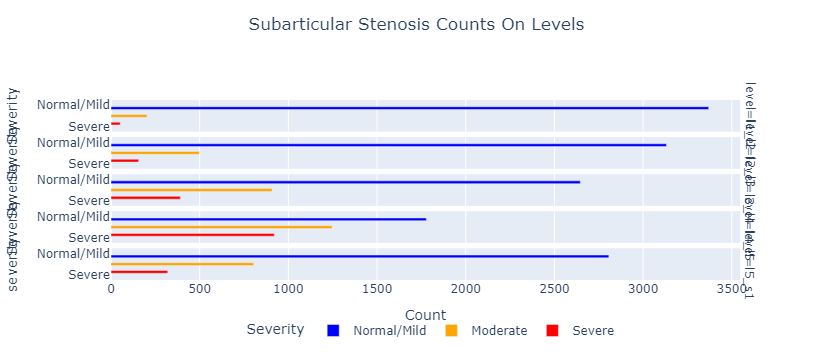

In [245]:
visualize_counts(
    df=df_train_subarticular_stenosis_counts, 
    disease_name='subarticular_stenosis', 
    plotly_title='Subarticular Stenosis Counts On Levels')

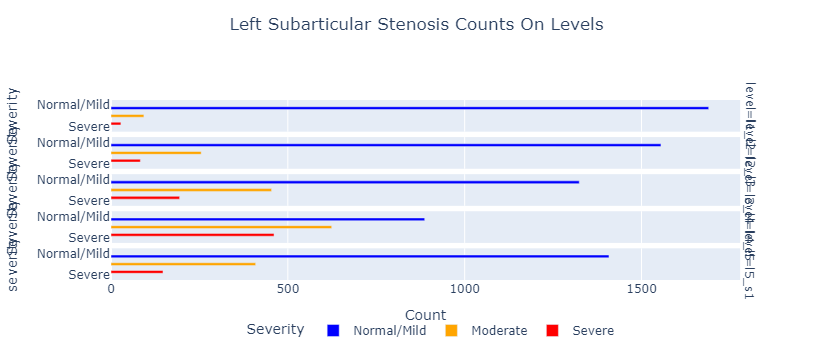

In [246]:
visualize_counts(
    df=df_train_left_subarticular_stenosis_counts, 
    disease_name='left_subarticular_stenosis', 
    plotly_title='Left Subarticular Stenosis Counts On Levels')

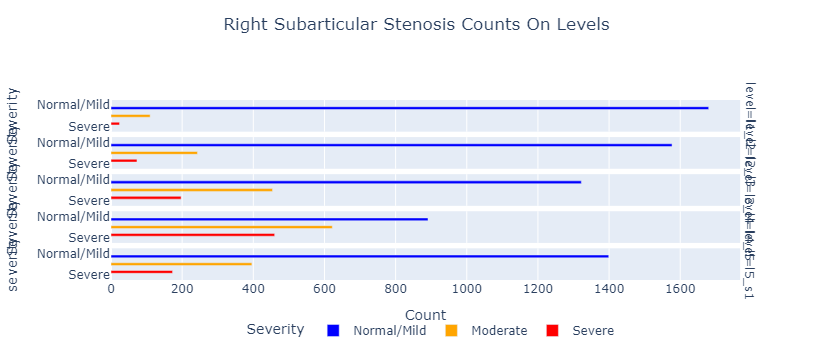

In [247]:
visualize_counts(
    df=df_train_right_subarticular_stenosis_counts, 
    disease_name='right_subarticular_stenosis', 
    plotly_title='Right Subarticular Stenosis Counts On Levels')

In [249]:
subarticular_stenosis_columns = [column for column in df_train.columns if 'subarticular_stenosis' in column]
subarticular_stenosis_columns

['left_subarticular_stenosis_l1_l2',
 'left_subarticular_stenosis_l2_l3',
 'left_subarticular_stenosis_l3_l4',
 'left_subarticular_stenosis_l4_l5',
 'left_subarticular_stenosis_l5_s1',
 'right_subarticular_stenosis_l1_l2',
 'right_subarticular_stenosis_l2_l3',
 'right_subarticular_stenosis_l3_l4',
 'right_subarticular_stenosis_l4_l5',
 'right_subarticular_stenosis_l5_s1']

In [257]:
df_train_left_right_subarticular_stenosis = []

In [258]:
for column in subarticular_stenosis_columns[:5]:
    df = df_train[[column]].copy(deep=True)
    df['level'] = '_'.join(column.split('_')[-2:])
    df = df.rename(columns={column: 'left_subarticular_stenosis'})
    df_train_left_right_subarticular_stenosis.append(df)

df_train_left_right_subarticular_stenosis

[     left_subarticular_stenosis  level
 0                   Normal/Mild  l1_l2
 1                   Normal/Mild  l1_l2
 2                   Normal/Mild  l1_l2
 3                   Normal/Mild  l1_l2
 4                   Normal/Mild  l1_l2
 ...                         ...    ...
 1970                Normal/Mild  l1_l2
 1971                Normal/Mild  l1_l2
 1972                Normal/Mild  l1_l2
 1973                Normal/Mild  l1_l2
 1974                Normal/Mild  l1_l2
 
 [1975 rows x 2 columns],
      left_subarticular_stenosis  level
 0                   Normal/Mild  l2_l3
 1                   Normal/Mild  l2_l3
 2                   Normal/Mild  l2_l3
 3                   Normal/Mild  l2_l3
 4                   Normal/Mild  l2_l3
 ...                         ...    ...
 1970                Normal/Mild  l2_l3
 1971                Normal/Mild  l2_l3
 1972                Normal/Mild  l2_l3
 1973                     Severe  l2_l3
 1974                Normal/Mild  l2_l3
 
 [1975 row

In [259]:
for column in subarticular_stenosis_columns[5:]:
    df = df_train[[column]].copy(deep=True)
    df['level'] = '_'.join(column.split('_')[-2:])
    df = df.rename(columns={column: 'right_subarticular_stenosis'})
    df_train_left_right_subarticular_stenosis.append(df)

df_train_left_right_subarticular_stenosis

[     left_subarticular_stenosis  level
 0                   Normal/Mild  l1_l2
 1                   Normal/Mild  l1_l2
 2                   Normal/Mild  l1_l2
 3                   Normal/Mild  l1_l2
 4                   Normal/Mild  l1_l2
 ...                         ...    ...
 1970                Normal/Mild  l1_l2
 1971                Normal/Mild  l1_l2
 1972                Normal/Mild  l1_l2
 1973                Normal/Mild  l1_l2
 1974                Normal/Mild  l1_l2
 
 [1975 rows x 2 columns],
      left_subarticular_stenosis  level
 0                   Normal/Mild  l2_l3
 1                   Normal/Mild  l2_l3
 2                   Normal/Mild  l2_l3
 3                   Normal/Mild  l2_l3
 4                   Normal/Mild  l2_l3
 ...                         ...    ...
 1970                Normal/Mild  l2_l3
 1971                Normal/Mild  l2_l3
 1972                Normal/Mild  l2_l3
 1973                     Severe  l2_l3
 1974                Normal/Mild  l2_l3
 
 [1975 row

In [260]:
df_train_left_right_subarticular_stenosis = pd.concat((
    pd.concat(df_train_left_right_subarticular_stenosis[:5], axis=0).reset_index(drop=True).iloc[:, :1],
    pd.concat(df_train_left_right_subarticular_stenosis[5:], axis=0).reset_index(drop=True)
), axis=1, ignore_index=False)

df_train_left_right_subarticular_stenosis

,left_subarticular_stenosis,right_subarticular_stenosis,level
0,Normal/Mild,Normal/Mild,l1_l2
1,Normal/Mild,Normal/Mild,l1_l2
2,Normal/Mild,Normal/Mild,l1_l2
3,Normal/Mild,Normal/Mild,l1_l2
4,Normal/Mild,Normal/Mild,l1_l2
...,...,...,...
9870,Normal/Mild,Moderate,l5_s1
9871,Normal/Mild,Normal/Mild,l5_s1
9872,Normal/Mild,Normal/Mild,l5_s1
9873,Normal/Mild,Normal/Mild,l5_s1


In [264]:
df_train_left_right_subarticular_stenosis['left_severity'] = df_train_left_right_subarticular_stenosis['left_subarticular_stenosis'].map({
    'Normal/Mild': 0,
    'Moderate': 1,
    'Severe': 2
})
df_train_left_right_subarticular_stenosis['right_severity'] = df_train_left_right_subarticular_stenosis['right_subarticular_stenosis'].map({
    'Normal/Mild': 0,
    'Moderate': 1,
    'Severe': 2
})
df_train_left_right_subarticular_stenosis['level_'] = df_train_left_right_subarticular_stenosis['level'].map({
    'l1_l2': 0,
    'l2_l3': 1,
    'l3_l4': 2,
    'l4_l5': 3,
    'l5_s1': 4
})
df_train_left_right_subarticular_stenosis

,left_subarticular_stenosis,right_subarticular_stenosis,level,left_severity,right_severity,level_
0,Normal/Mild,Normal/Mild,l1_l2,0.0,0.0,0
1,Normal/Mild,Normal/Mild,l1_l2,0.0,0.0,0
2,Normal/Mild,Normal/Mild,l1_l2,0.0,0.0,0
3,Normal/Mild,Normal/Mild,l1_l2,0.0,0.0,0
4,Normal/Mild,Normal/Mild,l1_l2,0.0,0.0,0
...,...,...,...,...,...,...
9870,Normal/Mild,Moderate,l5_s1,0.0,1.0,4
9871,Normal/Mild,Normal/Mild,l5_s1,0.0,0.0,4
9872,Normal/Mild,Normal/Mild,l5_s1,0.0,0.0,4
9873,Normal/Mild,Normal/Mild,l5_s1,0.0,0.0,4


In [267]:
'''
좌우 관절하 협착의 중증도는 상관계수가 0.581로 서로 유의한 상관관계가 있음을 알 수 있습니다.
'''

'\n좌우 관절하 협착의 중증도는 상관계수가 0.581로 서로 유의한 상관관계가 있음을 알 수 있습니다.\n'

In [268]:
df_subarticular_stenosis_correlations = df_train_left_right_subarticular_stenosis[['level_', 'left_severity', 'right_severity']].corr()
display(df_subarticular_stenosis_correlations)

,level_,left_severity,right_severity
level_,1.000000,0.236914,0.245518
left_severity,0.236914,1.000000,0.581930
right_severity,0.245518,0.581930,1.000000


In [269]:
'''
Lateral (Subarticular) Stenosis 측면(비관절) 협착:
협착은 척추관의 일부인 측면 오목 또는 관절하 공간에서 발생합니다
특히 신경근이 척추를 빠져나오기 전에 이동하는 안면 관절 아래 부분에 영향을 미칩니다

Spinal Canal (Central) Stenosis 척추관(중앙) 협착:
협착은 척수 또는 꼬리 등골(요추)이 위치한 중앙 척추관에서 발생합니다
척수와 신경이 이동하는 주요 통로에 영향을 미칩니다

Foraminal Stenosis 포르말린 협착:
신경근이 척추를 빠져나가는 척추 양쪽의 개구부인 신경포라미나에 협착이 발생합니다
신경이 척추관을 빠져나와 신체의 다른 부분으로 확장되는 공간에 직접적인 영향을 미칩니다
'''

'\nLateral (Subarticular) Stenosis 측면(비관절) 협착:\n협착은 척추관의 일부인 측면 오목 또는 관절하 공간에서 발생합니다\n특히 신경근이 척추를 빠져나오기 전에 이동하는 안면 관절 아래 부분에 영향을 미칩니다\n\nSpinal Canal (Central) Stenosis 척추관(중앙) 협착:\n협착은 척수 또는 꼬리 등골(요추)이 위치한 중앙 척추관에서 발생합니다\n척수와 신경이 이동하는 주요 통로에 영향을 미칩니다\n\nForaminal Stenosis 포르말린 협착:\n신경근이 척추를 빠져나가는 척추 양쪽의 개구부인 신경포라미나에 협착이 발생합니다\n신경이 척추관을 빠져나와 신체의 다른 부분으로 확장되는 공간에 직접적인 영향을 미칩니다\n'

In [270]:
'''
결측치
결측값은 모든 조건에 존재

spinal_canal_stenosis_l1_l2: 1
spinal_canal_stenosis_l2_l3: 1
spinal_canal_stenosis_l3_l4: 1
spinal_canal_stenosis_l4_l5: 1
spinal_canal_stenosis_l5_s1: 1
left_neural_foraminal_narrowing_l1_l2: 2
left_neural_foraminal_narrowing_l2_l3: 2
left_neural_foraminal_narrowing_l3_l4: 2
left_neural_foraminal_narrowing_l4_l5: 2
left_neural_foraminal_narrowing_l5_s1: 2
right_neural_foraminal_narrowing_l1_l2: 8
right_neural_foraminal_narrowing_l2_l3: 8
right_neural_foraminal_narrowing_l3_l4: 8
right_neural_foraminal_narrowing_l4_l5: 8
right_neural_foraminal_narrowing_l5_s1: 8
left_subarticular_stenosis_l1_l2: 164
left_subarticular_stenosis_l2_l3: 82
left_subarticular_stenosis_l3_l4: 3
left_subarticular_stenosis_l4_l5: 3
left_subarticular_stenosis_l5_s1: 11
right_subarticular_stenosis_l1_l2: 161
right_subarticular_stenosis_l2_l3: 82
right_subarticular_stenosis_l3_l4: 2
right_subarticular_stenosis_l4_l5: 2
right_subarticular_stenosis_l5_s1: 7


척추관 협착증(1)과 신경공 협착(왼쪽 2개 및 오른쪽 8개)에 대한 누락된 값은 거의 없습니다. 
모든 수준에서 일관되게 누락되어 있으므로 불완전한 라벨은 해당 연구에서 
가장 낮은 척추뼈가 보이지 않는 것과 관련이 없을 수 있습니다.

관절하 협착증에는 다른 두 가지 조건에 비해 결측값이 더 많고, 결측값 개수는 수준에 따라 다릅니다. 
레벨에 따라 감소하므로 가장 낮은 척추뼈도 보이지 않는 것과 관련이 없습니다. 
이 조건의 경우 결측값 개수는 왼쪽과 오른쪽에서 일관됩니다.

'''

'\n결측치\n결측값은 모든 조건에 존재\n\nspinal_canal_stenosis_l1_l2: 1\nspinal_canal_stenosis_l2_l3: 1\nspinal_canal_stenosis_l3_l4: 1\nspinal_canal_stenosis_l4_l5: 1\nspinal_canal_stenosis_l5_s1: 1\nleft_neural_foraminal_narrowing_l1_l2: 2\nleft_neural_foraminal_narrowing_l2_l3: 2\nleft_neural_foraminal_narrowing_l3_l4: 2\nleft_neural_foraminal_narrowing_l4_l5: 2\nleft_neural_foraminal_narrowing_l5_s1: 2\nright_neural_foraminal_narrowing_l1_l2: 8\nright_neural_foraminal_narrowing_l2_l3: 8\nright_neural_foraminal_narrowing_l3_l4: 8\nright_neural_foraminal_narrowing_l4_l5: 8\nright_neural_foraminal_narrowing_l5_s1: 8\nleft_subarticular_stenosis_l1_l2: 164\nleft_subarticular_stenosis_l2_l3: 82\nleft_subarticular_stenosis_l3_l4: 3\nleft_subarticular_stenosis_l4_l5: 3\nleft_subarticular_stenosis_l5_s1: 11\nright_subarticular_stenosis_l1_l2: 161\nright_subarticular_stenosis_l2_l3: 82\nright_subarticular_stenosis_l3_l4: 2\nright_subarticular_stenosis_l4_l5: 2\nright_subarticular_stenosis_l5_s1: 7\n\n\n척추관

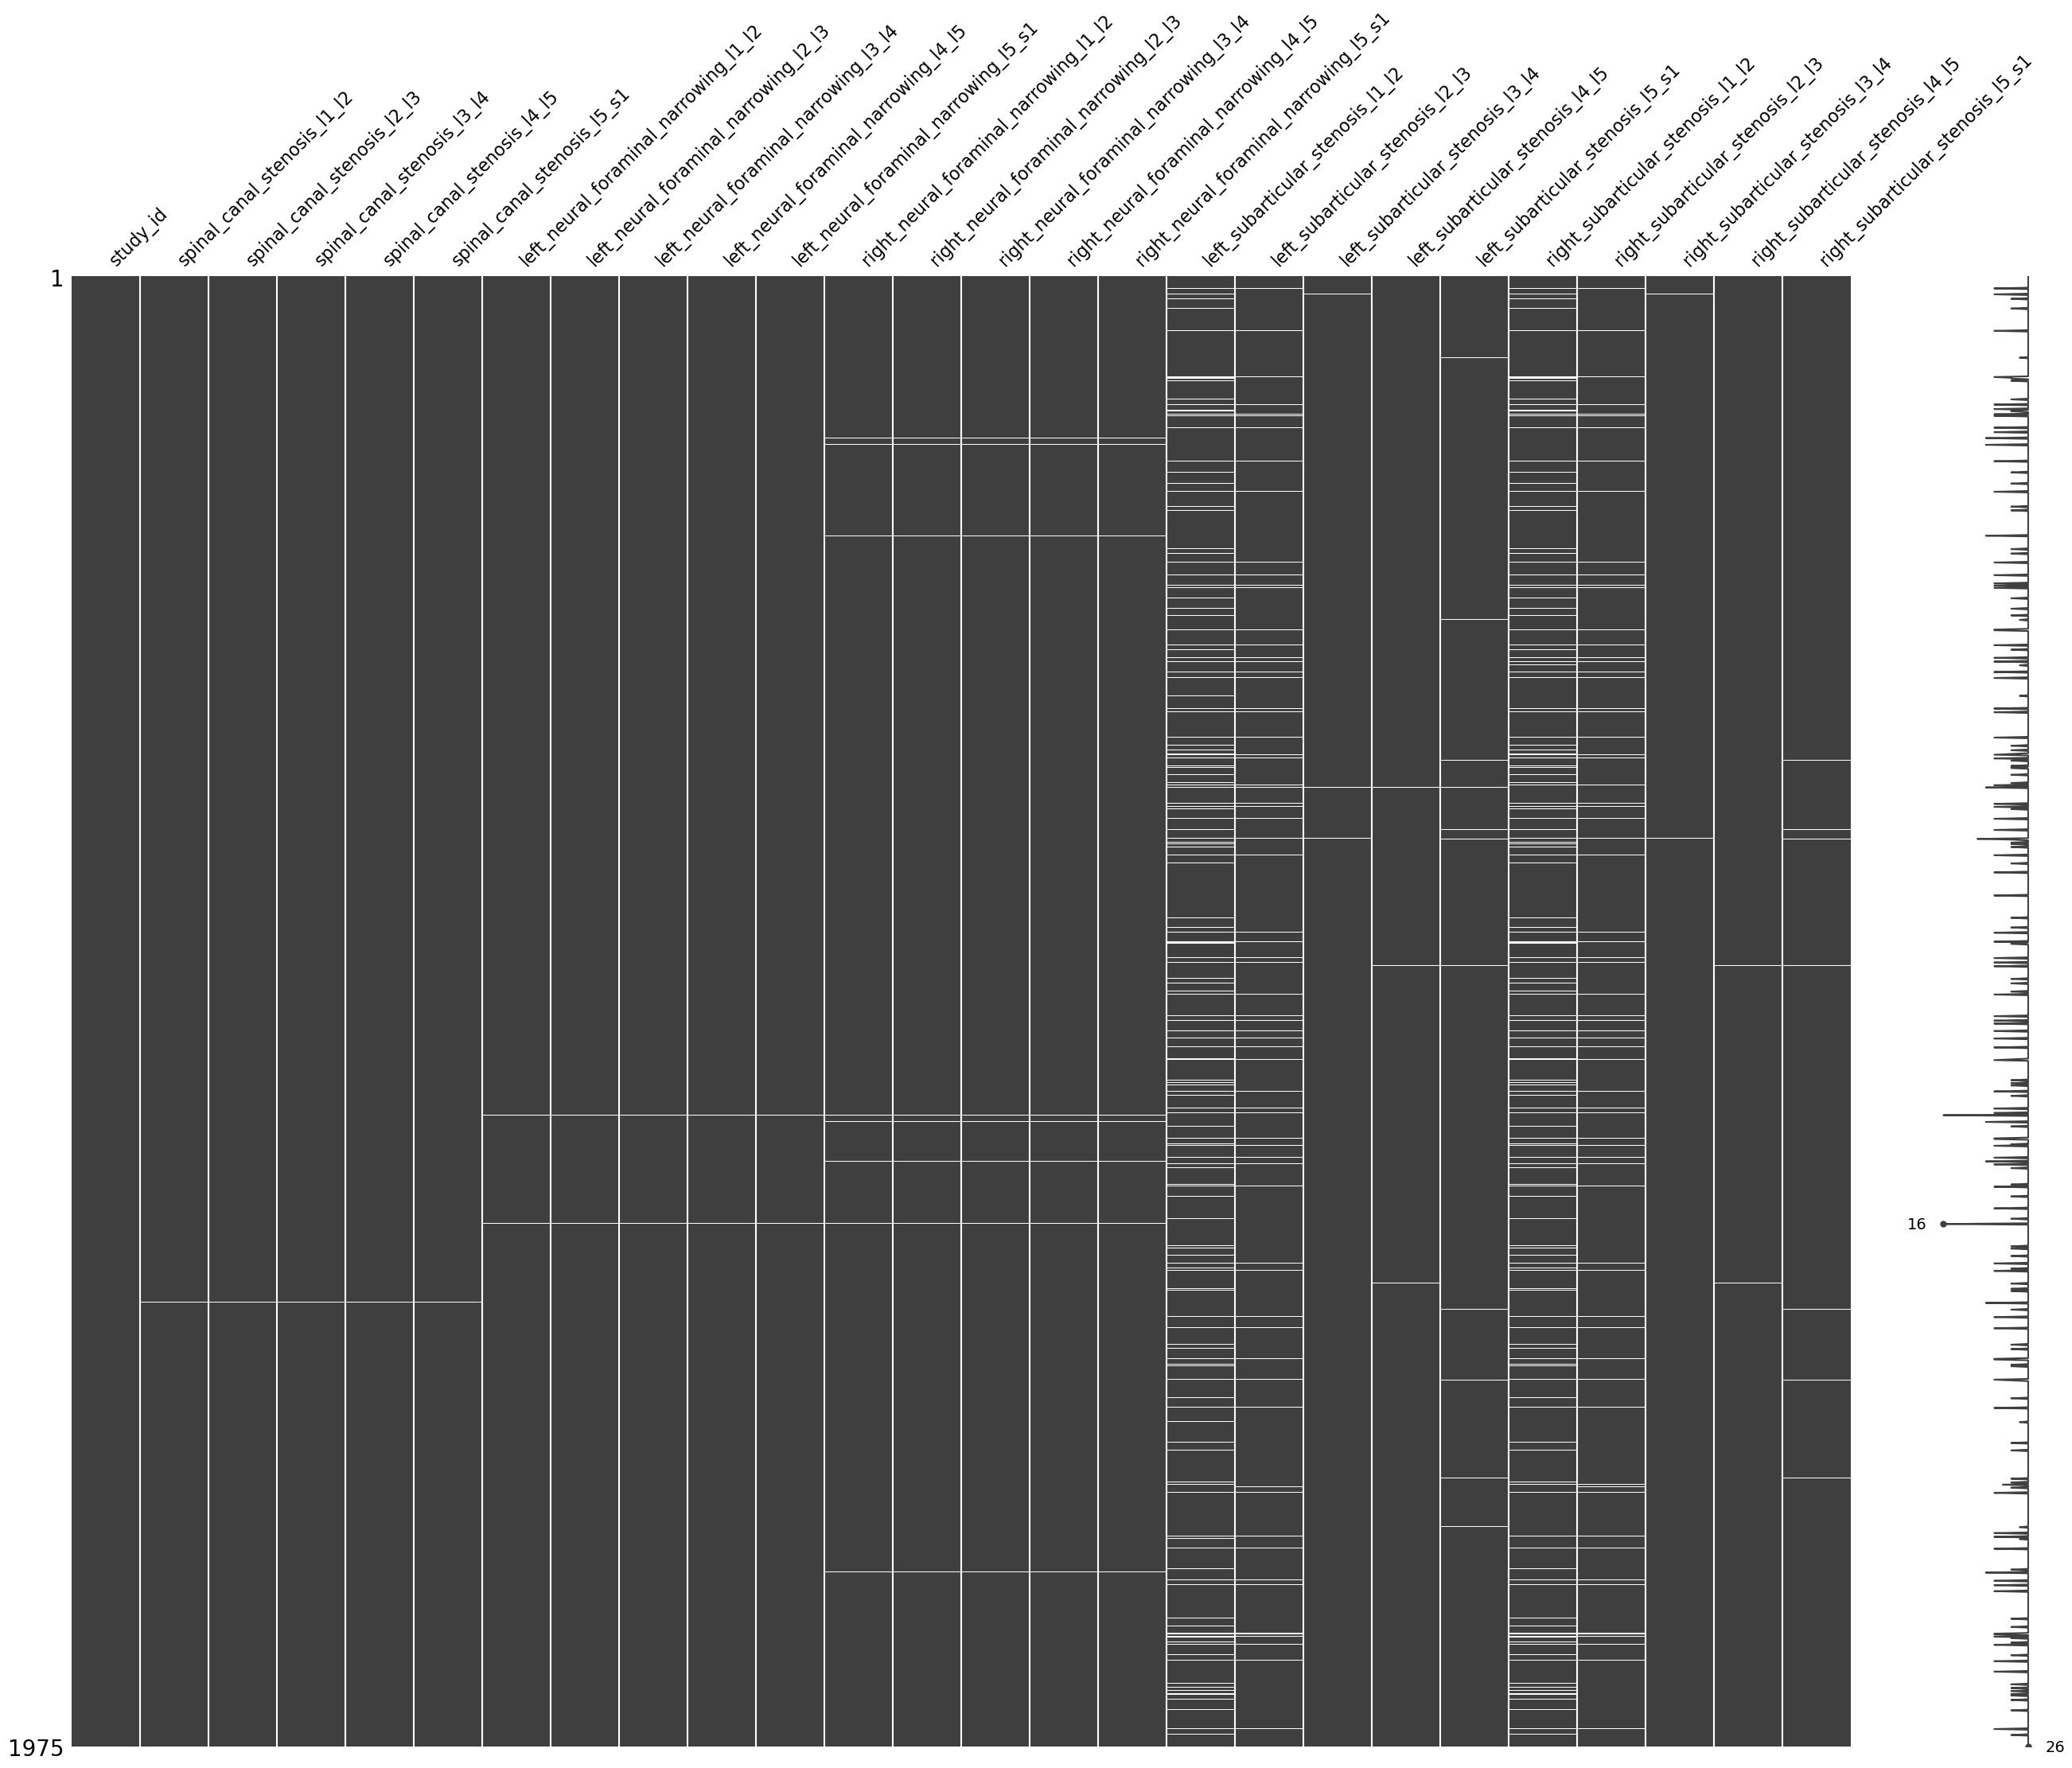

In [272]:
# df_train의 결측치 확인
msno.matrix(df_train, figsize=(32, 24))
plt.show()

In [273]:
'''
결측값의 종속성은 아래 덴드로그램에서 더 명확하게 볼 수 있습니다. 8개의 그룹이 형성되어 있습니다.

모든 수준에서 척추관 협착증 누락된 값
모든 수준에서 왼쪽 신경공 협착 결측값
모든 수준에서 오른쪽 신경공 협착 결측값
l1_l2의 왼쪽 및 오른쪽 관절하 협착증 누락 값
l2_l3의 왼쪽 및 오른쪽 관절하 협착증 누락 값
l3_l4의 왼쪽 및 오른쪽 관절하 협착증 누락 값
l4_l5의 왼쪽 및 오른쪽 관절하 협착증 누락 값
l5_s1의 왼쪽 및 오른쪽 관절하 협착증 누락 값
'''

'\n결측값의 종속성은 아래 덴드로그램에서 더 명확하게 볼 수 있습니다. 8개의 그룹이 형성되어 있습니다.\n\n모든 수준에서 척추관 협착증 누락된 값\n모든 수준에서 왼쪽 신경공 협착 결측값\n모든 수준에서 오른쪽 신경공 협착 결측값\nl1_l2의 왼쪽 및 오른쪽 관절하 협착증 누락 값\nl2_l3의 왼쪽 및 오른쪽 관절하 협착증 누락 값\nl3_l4의 왼쪽 및 오른쪽 관절하 협착증 누락 값\nl4_l5의 왼쪽 및 오른쪽 관절하 협착증 누락 값\nl5_s1의 왼쪽 및 오른쪽 관절하 협착증 누락 값\n'

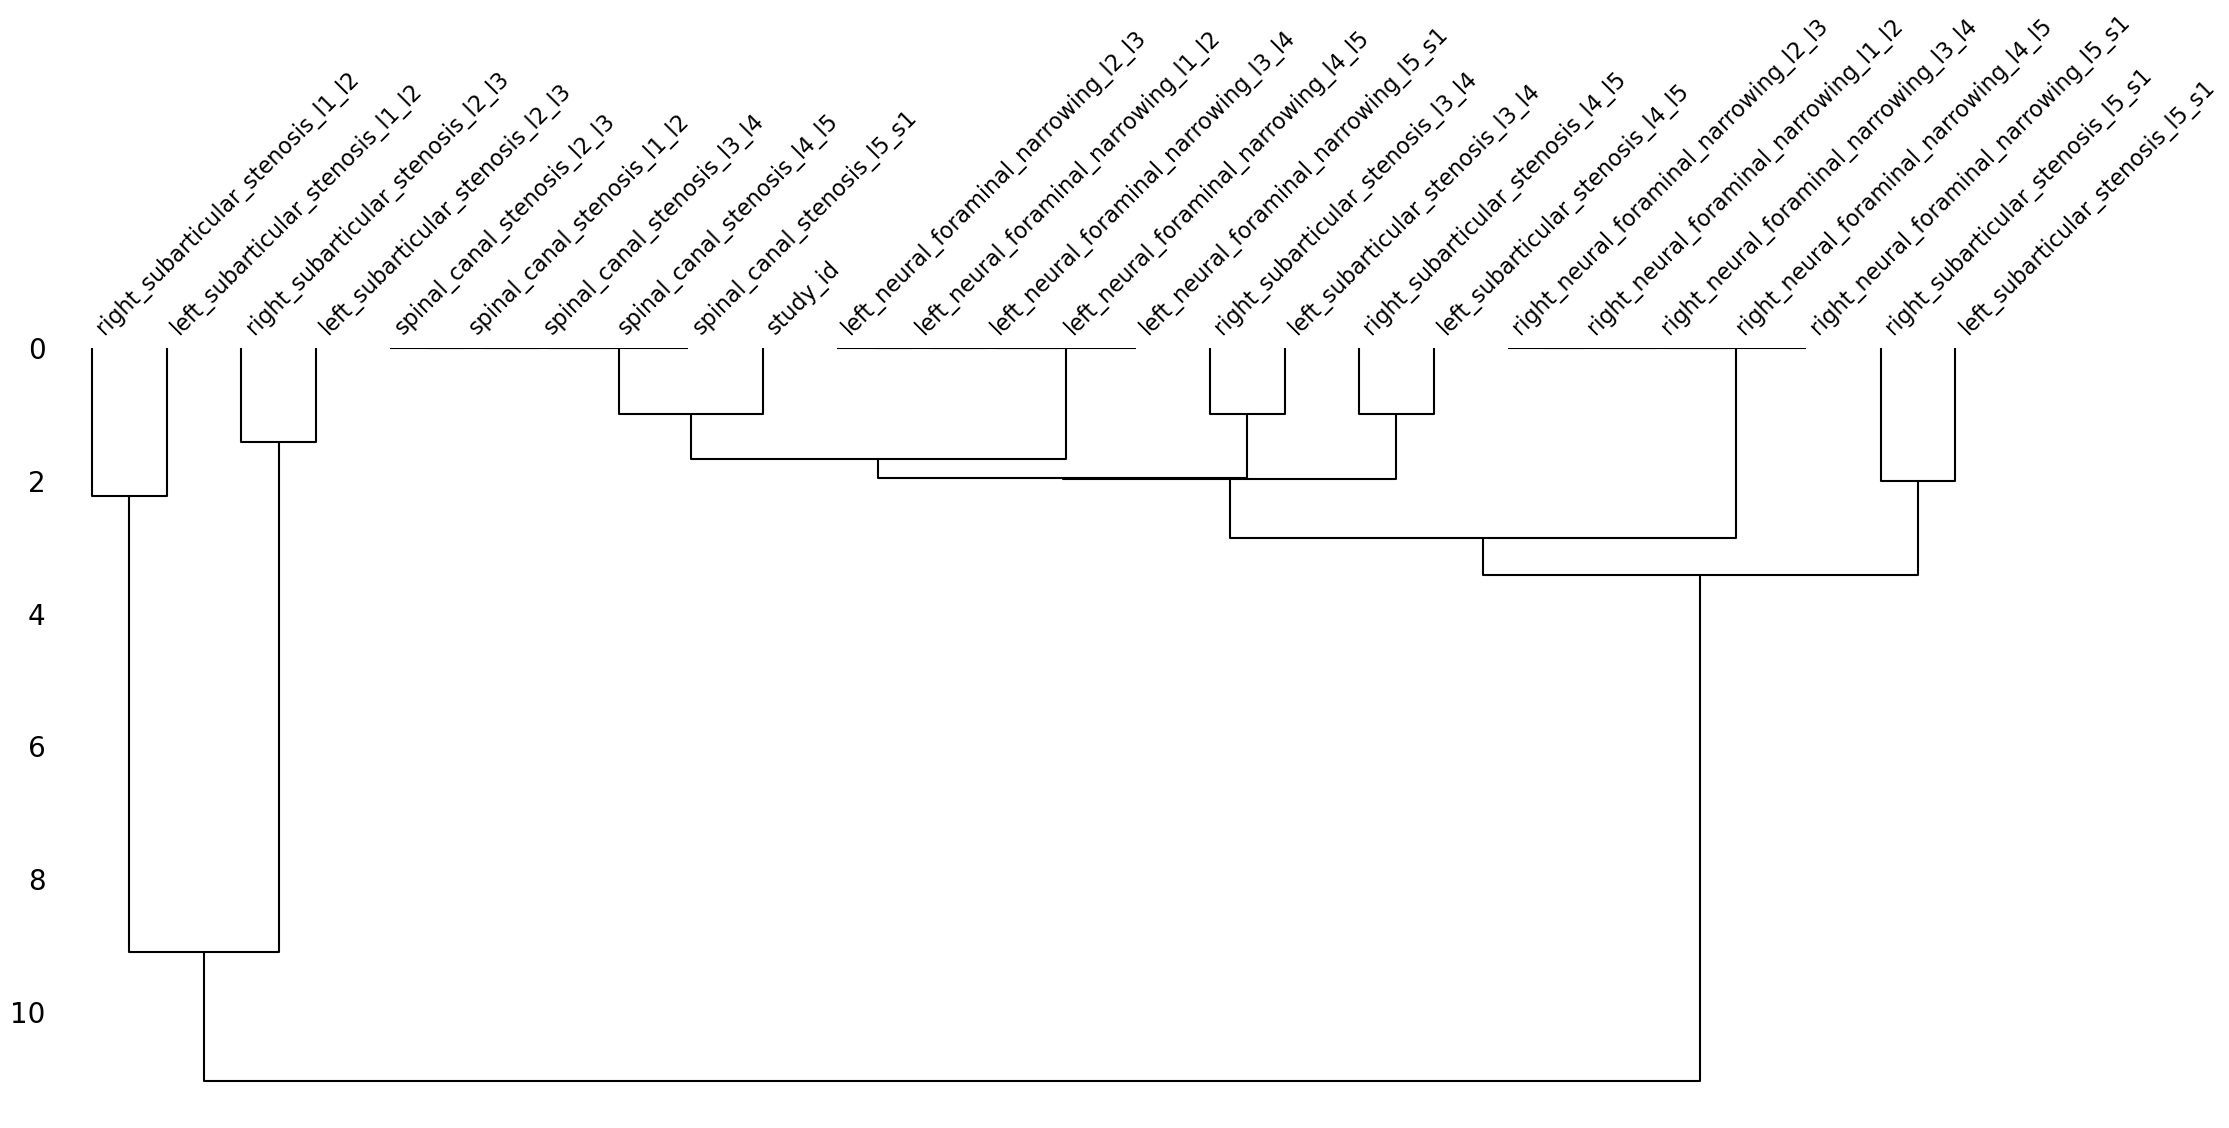

In [274]:
msno.dendrogram(df_train)
plt.show()

In [331]:
'''
Modalities(방식) and Planes(평면 ?)

MRI(자기공명영상) Modalities방식은 신체 내부 구조의 이미지를 캡처하기 위해 스캔하는 동안 사용되는 
다양한 기술과 시퀀스를 의미합니다. MRI Planes(평면 ?)은 스캔 중에 이미지가 촬영되는 특정 방향 또는 방향을 나타냅니다.

MRI 영상 방식과 시리즈 평면은 train_series_descriptions.csv 파일에 제공됩니다. 
연구의 시리즈 수는 해당 데이터에서도 얻을 수 있습니다.
'''

'\nModalities(방식) and Planes(평면 ?)\n\nMRI(자기공명영상) Modalities방식은 신체 내부 구조의 이미지를 캡처하기 위해 스캔하는 동안 사용되는 \n다양한 기술과 시퀀스를 의미합니다. MRI Planes(평면 ?)은 스캔 중에 이미지가 촬영되는 특정 방향 또는 방향을 나타냅니다.\n\nMRI 영상 방식과 시리즈 평면은 train_series_descriptions.csv 파일에 제공됩니다. \n연구의 시리즈 수는 해당 데이터에서도 얻을 수 있습니다.\n'

In [276]:
train_series = glob(str(competition_dataset_directory / 'train_images' / '*' / '*'))

In [277]:
print(f'Train Series Descriptions Shape: {df_train_series_descriptions.shape}')
print(f'Train Series Count {len(train_series)}')

display(df_train_series_descriptions)

Train Series Descriptions Shape: (6294, 3)
Train Series Count 6294


,study_id,series_id,series_description
0,4003253,702807833,Sagittal T2/STIR
1,4003253,1054713880,Sagittal T1
2,4003253,2448190387,Axial T2
3,4646740,3201256954,Axial T2
4,4646740,3486248476,Sagittal T1
...,...,...,...
6289,4287160193,1507070277,Sagittal T2/STIR
6290,4287160193,1820446240,Axial T2
6291,4290709089,3274612423,Sagittal T2/STIR
6292,4290709089,3390218084,Axial T2


In [287]:
df_train_series_counts = df_train_series_descriptions.groupby('study_id')['series_id'].count().value_counts().reset_index().rename(columns={'series_id': 'series_count'})
df_train_series_counts

,series_count,count
0,3,1632
1,4,309
2,5,30
3,2,3
4,6,1


In [298]:
df_train_series_counts['percentage'] = df_train_series_counts['count'] / df_train_series_counts['count'].sum(axis=0) * 100
df_train_series_counts

,series_count,count,percentage
0,3,1632,82.632911
1,4,309,15.645570
2,5,30,1.518987
3,2,3,0.151899
4,6,1,0.050633


In [309]:
df_train_series_counts['series_count'] = df_train_series_counts['series_count'].astype(str)
df_train_series_counts

,series_count,count,percentage
0,3,1632,82.632911
1,4,309,15.645570
2,5,30,1.518987
3,2,3,0.151899
4,6,1,0.050633


In [342]:
def plotly_counts(df, value, title) :
 df = df.copy().iloc[::-1]
 fig = px.bar(df, x='count', y=value, orientation='h',
             text='count', title=title)

 fig.update_layout(yaxis=dict(tickmode='linear'),
                  xaxis_title='Count',
                  yaxis_title='',  # y축 이름 제거
                  title={'text': title, 'x': 0.5},
                  bargap=0.5)

 fig.update_traces(texttemplate='%{text} (%{customdata:.2f}%)', textposition='outside')

 fig.for_each_trace(lambda t: t.update(customdata=df['percentage']))

 fig.show()

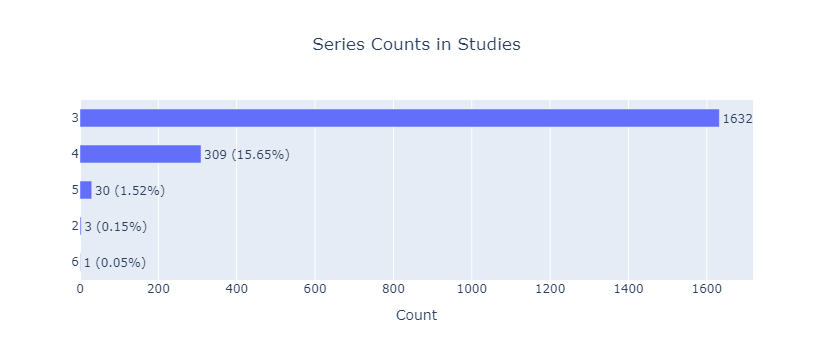

In [343]:
plotly_counts(df=df_train_series_counts, 
              value='series_count', 
              title='Series Counts in Studies')

In [327]:
df_train_series_descriptions['plane'] = df_train_series_descriptions['series_description'].apply(lambda x: str(x).split()[0].strip())
df_train_series_descriptions['plane']

0       Sagittal
1       Sagittal
2          Axial
3          Axial
4       Sagittal
          ...   
6289    Sagittal
6290       Axial
6291    Sagittal
6292       Axial
6293    Sagittal
Name: plane, Length: 6294, dtype: object

In [329]:
df_train_series_descriptions['modality'] = df_train_series_descriptions['series_description'].apply(lambda x: str(x).split()[-1].strip())
df_train_series_descriptions

,study_id,series_id,series_description,plane,modality
0,4003253,702807833,Sagittal T2/STIR,Sagittal,T2/STIR
1,4003253,1054713880,Sagittal T1,Sagittal,T1
2,4003253,2448190387,Axial T2,Axial,T2
3,4646740,3201256954,Axial T2,Axial,T2
4,4646740,3486248476,Sagittal T1,Sagittal,T1
...,...,...,...,...,...
6289,4287160193,1507070277,Sagittal T2/STIR,Sagittal,T2/STIR
6290,4287160193,1820446240,Axial T2,Axial,T2
6291,4290709089,3274612423,Sagittal T2/STIR,Sagittal,T2/STIR
6292,4290709089,3390218084,Axial T2,Axial,T2


In [333]:
df_train_series_description_counts = df_train_series_descriptions['series_description'].value_counts().reset_index()
df_train_series_description_counts

,series_description,count
0,Axial T2,2340
1,Sagittal T1,1980
2,Sagittal T2/STIR,1974


In [334]:
df_train_series_description_counts['percentage'] = df_train_series_description_counts['count'] / df_train_series_description_counts['count'].sum(axis=0) * 100
df_train_series_description_counts

,series_description,count,percentage
0,Axial T2,2340,37.178265
1,Sagittal T1,1980,31.458532
2,Sagittal T2/STIR,1974,31.363203


In [336]:
df_train_series_plane_counts = df_train_series_descriptions['plane'].value_counts().reset_index()
df_train_series_plane_counts

,plane,count
0,Sagittal,3954
1,Axial,2340


In [337]:
df_train_series_plane_counts['percentage'] = df_train_series_plane_counts['count'] / df_train_series_plane_counts['count'].sum(axis=0) * 100
df_train_series_plane_counts

,plane,count,percentage
0,Sagittal,3954,62.821735
1,Axial,2340,37.178265


In [338]:
df_train_series_modality_counts = df_train_series_descriptions['modality'].value_counts().reset_index()
df_train_series_modality_counts['percentage'] = df_train_series_modality_counts['count'] / df_train_series_modality_counts['count'].sum(axis=0) * 100
df_train_series_modality_counts

,modality,count,percentage
0,T2,2340,37.178265
1,T1,1980,31.458532
2,T2/STIR,1974,31.363203


In [339]:
'''
데이터 세트에는 세 가지 고유한 MRI 양식이 있다.
T1 강조 영상(T1), 
T2 강조 영상(T2),
T2/STIR(Short Tau Inversion Recovery)을 사용한 T2 강조 영상



1. T1 강조 영상

특성
고해상도 해부학적 디테일: 신체 구조의 선명한 영상을 제공합니다
조영제: 지방을 시각화하고 여러 종류의 조직을 구별하는 데 좋습니다

용도
해부학적 세부사항 : 정상 해부학적 평가 및 구조적 이상 확인에 탁월함
병리학 : 지방, 아급성 출혈, 특정 병변 발견에 유용함
조영 후 영상 : 혈관 및 종양을 강조하기 위해 가돌리늄 조영제와 함께 사용하는 경우가 많습니다

외관
지방: 밝게 나타남
물: 진하게 보입니다
근육 및 기타 연조직: 중간 신호 강도

응용 프로그램
뇌: 회백질과 백질의 감별, 출혈 감별
척추 : 척추체 및 디스크 공간 평가
복부: 장기를 시각화하고 지방간 질환을 발견합니다


2. T2 강조 영상

특성
유체 감응형: 유체를 포함하는 구조를 강조합니다
병리학적 대조 : 수분함량과 관련된 광범위한 병리를 검출하는데 효과적임

용도
병리 : 부종, 염증, 종양 확인에 탁월함
상태 : 낭종, 농양, 퇴행성 변화를 감지하는 데 일반적으로 사용됩니다

외관
물과 액체: 밝게 보입니다
Fat : T1 강조 영상에 비해 밝기가 떨어짐
근육 및 기타 연조직: 중간에서 어두운 신호 강도

응용 프로그램
뇌: 병변, 부종, 탈수성 질환 감지
척추 : 디스크, 척추관협착증, 기타 퇴행성 질환 확인
관절 : 관절 삼출액 및 연골 완전성 평가


3. STIR(Short Tau Inversion Recovery)을 사용한 T2 강조 영상

특성
지방 억제: 지방에서 오는 신호를 특별히 억제하여 체액과 관련된 병인을 보다 쉽게 볼 수 있도록 합니다
조영증강 : 부종 및 염증 가시성 향상

용도
병리: 부종, 염증, 골수 이상을 발견하는데 특히 유용합니다
근골격계 영상 : 근육, 힘줄, 인대, 골수 등을 평가할 때 흔히 사용합니다

외관
물과 액체: 밝게 보입니다
지방: 억제되어 검게 보입니다
근육 및 기타 연조직: 중간 신호 강도

응용 프로그램
척추 : 골수 부종 및 연조직 이상 평가
근골격계 : 염좌, 변형, 근육파열 등의 손상 평가
종양학 : 종양을 발견하고 그 범위를 평가합니다




데이터 세트 내에서 그들의 수와 백분율은 아래에 시각화되어 있습니다. 
연구의 98% 이상이 3개 또는 4개의 계열을 가지고 있기 때문에 모달리티는 어느 정도 균등하게 분포되어 있습니다.
'''

'\n데이터 세트에는 세 가지 고유한 MRI 양식이 있다.\nT1 강조 영상(T1), \nT2 강조 영상(T2),\nT2/STIR(Short Tau Inversion Recovery)을 사용한 T2 강조 영상\n\n\n\n1. T1 강조 영상\n\n특성\n고해상도 해부학적 디테일: 신체 구조의 선명한 영상을 제공합니다\n조영제: 지방을 시각화하고 여러 종류의 조직을 구별하는 데 좋습니다\n\n용도\n해부학적 세부사항 : 정상 해부학적 평가 및 구조적 이상 확인에 탁월함\n병리학 : 지방, 아급성 출혈, 특정 병변 발견에 유용함\n조영 후 영상 : 혈관 및 종양을 강조하기 위해 가돌리늄 조영제와 함께 사용하는 경우가 많습니다\n\n외관\n지방: 밝게 나타남\n물: 진하게 보입니다\n근육 및 기타 연조직: 중간 신호 강도\n\n응용 프로그램\n뇌: 회백질과 백질의 감별, 출혈 감별\n척추 : 척추체 및 디스크 공간 평가\n복부: 장기를 시각화하고 지방간 질환을 발견합니다\n\n\n2. T2 강조 영상\n\n특성\n유체 감응형: 유체를 포함하는 구조를 강조합니다\n병리학적 대조 : 수분함량과 관련된 광범위한 병리를 검출하는데 효과적임\n\n용도\n병리 : 부종, 염증, 종양 확인에 탁월함\n상태 : 낭종, 농양, 퇴행성 변화를 감지하는 데 일반적으로 사용됩니다\n\n외관\n물과 액체: 밝게 보입니다\nFat : T1 강조 영상에 비해 밝기가 떨어짐\n근육 및 기타 연조직: 중간에서 어두운 신호 강도\n\n응용 프로그램\n뇌: 병변, 부종, 탈수성 질환 감지\n척추 : 디스크, 척추관협착증, 기타 퇴행성 질환 확인\n관절 : 관절 삼출액 및 연골 완전성 평가\n\n\n3. STIR(Short Tau Inversion Recovery)을 사용한 T2 강조 영상\n\n특성\n지방 억제: 지방에서 오는 신호를 특별히 억제하여 체액과 관련된 병인을 보다 쉽게 볼 수 있도록 합니다\n조영증강 : 부종 및 염증 가시성 향상\n\n용도\n병리: 부종, 염증, 골수 이상을 발견하는

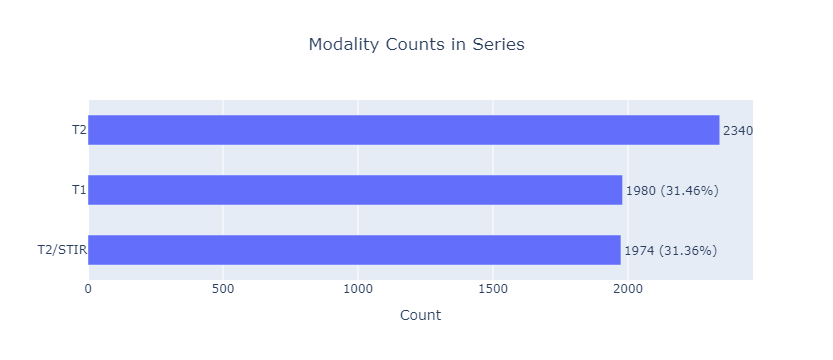

In [344]:
plotly_counts(df=df_train_series_modality_counts, 
              value='modality', 
              title='Modality Counts in Series')

In [345]:
'''
데이터 세트에는 두 개의 고유한 평면이 있으며, 그것들은 Sagittal(시상)과 Axial(시상)입니다. 
Coronal(시상)이라는 다른 평면도 있지만 그 평면에는 MRI가 제공되지 않습니다.

1. Sagittal Plane

설명: 이 평면은 신체를 좌우로 나눕니다

방향: 옆에서 마치 몸을 보는 것처럼 이미지를 옆에서 촬영합니다

일반적인 용도:
척추, 뇌, 관절 등 신체 중심선을 따라 구조물을 볼 때 유용합니다
앞에서 뒤로 이어지는 구조물의 정렬 및 관계를 평가하는 데 도움이 됩니다


2. Axial Plane

설명: 이 평면은 신체를 상부(우량)와 하부(우량)로 구분합니다

방향: 발에서 위를 보거나 머리에서 아래를 보는 것처럼 이미지를 촬영하여 신체의 수평 단면을 제공합니다

일반적인 용도:
일반적으로 뇌, 척추, 복부 및 골반을 볼 때 사용됩니다
단면 해부학적 검사가 가능하여 종양, 병변 또는 부상과 같은 이상을 쉽게 감지할 수 있습니다
'''

'\n데이터 세트에는 두 개의 고유한 평면이 있으며, 그것들은 Sagittal(시상)과 Axial(시상)입니다. \nCoronal(시상)이라는 다른 평면도 있지만 그 평면에는 MRI가 제공되지 않습니다.\n\n1. Sagittal Plane\n\n설명: 이 평면은 신체를 좌우로 나눕니다\n\n방향: 옆에서 마치 몸을 보는 것처럼 이미지를 옆에서 촬영합니다\n\n일반적인 용도:\n척추, 뇌, 관절 등 신체 중심선을 따라 구조물을 볼 때 유용합니다\n앞에서 뒤로 이어지는 구조물의 정렬 및 관계를 평가하는 데 도움이 됩니다\n\n\n2. Axial Plane\n\n설명: 이 평면은 신체를 상부(우량)와 하부(우량)로 구분합니다\n\n방향: 발에서 위를 보거나 머리에서 아래를 보는 것처럼 이미지를 촬영하여 신체의 수평 단면을 제공합니다\n\n일반적인 용도:\n일반적으로 뇌, 척추, 복부 및 골반을 볼 때 사용됩니다\n단면 해부학적 검사가 가능하여 종양, 병변 또는 부상과 같은 이상을 쉽게 감지할 수 있습니다\n'

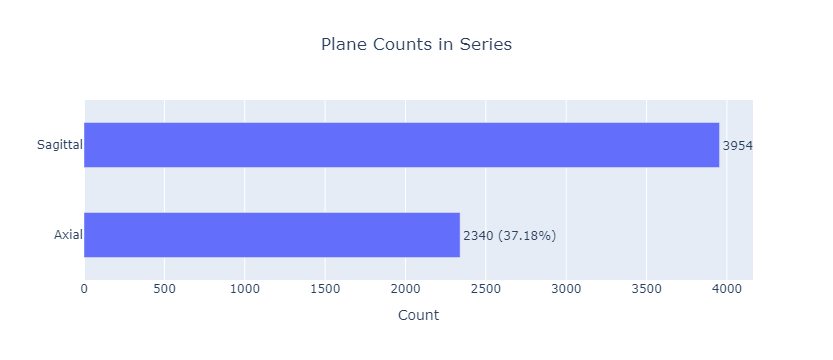

In [346]:
plotly_counts(df=df_train_series_plane_counts, 
              value='plane', 
              title='Plane Counts in Series')

In [347]:
'''
마지막으로 평면 및 모달리티 조합의 카운트 및 백분율이 아래에 시각화됩니다. 
이는 모달리티의 카운트 및 백분율과 동일합니다.
'''

'\n마지막으로 평면 및 모달리티 조합의 카운트 및 백분율이 아래에 시각화됩니다. \n이는 모달리티의 카운트 및 백분율과 동일합니다.\n'

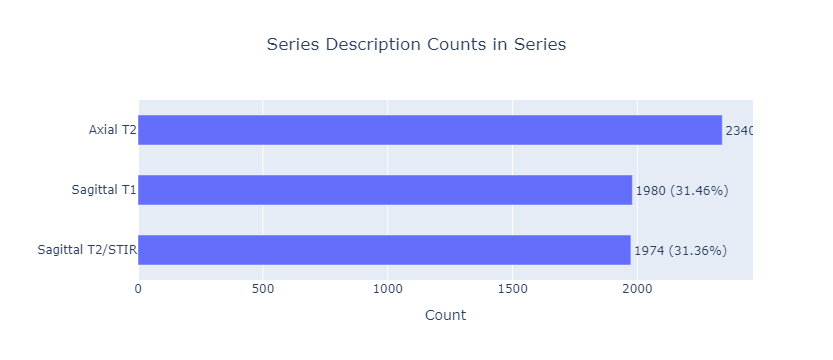

In [348]:
plotly_counts(df=df_train_series_description_counts, 
              value='series_description', 
              title='Series Description Counts in Series')

In [349]:
'''
레이블 좌표

레이블 좌표는 train_label_coordinates.csv 파일에 제공되며, 조건이 관찰되는 영역의 중심에 대한 x/y 좌표입니다.

스터디 수준 레이블과 영상 시리즈 설명을 병합하여 ID 필드의 좌표 데이터 프레임에 레이블을 지정할 수 있습니다.
'''

'\n레이블 좌표\n\n레이블 좌표는 train_label_coordinates.csv 파일에 제공되며, 조건이 관찰되는 영역의 중심에 대한 x/y 좌표입니다.\n\n스터디 수준 레이블과 영상 시리즈 설명을 병합하여 ID 필드의 좌표 데이터 프레임에 레이블을 지정할 수 있습니다.\n'

In [350]:
print(f'Train Label Coordinates Shape: {df_train_label_coordinates.shape}')
print(f'Annotated Studies {df_train_label_coordinates["study_id"].nunique()}/{df_train.shape[0]}')
print(f'Annotated Series {df_train_label_coordinates["series_id"].nunique()}/{df_train_series_descriptions.shape[0]}')

Train Label Coordinates Shape: (48692, 7)
Annotated Studies 1974/1975
Annotated Series 6291/6294


In [352]:
df_train_label_coordinates

,study_id,series_id,instance_number,condition,level,x,y
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602
...,...,...,...,...,...,...,...
48687,4290709089,4237840455,11,Left Neural Foraminal Narrowing,L1/L2,219.465940,97.831063
48688,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L2/L3,205.340599,140.207084
48689,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L3/L4,202.724796,181.013624
48690,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L4/L5,202.933333,219.733333


In [355]:
df_train_label_coordinates = df_train_label_coordinates.merge(
    df_train,
    on='study_id',
    how='left'
).merge(
    df_train_series_descriptions,
    on=['study_id', 'series_id'],
    how='left'
)
df_train_label_coordinates

,study_id,series_id,instance_number,condition,level,x,y,spinal_canal_stenosis_l1_l2_x,spinal_canal_stenosis_l2_l3_x,spinal_canal_stenosis_l3_l4_x,spinal_canal_stenosis_l4_l5_x,spinal_canal_stenosis_l5_s1_x,left_neural_foraminal_narrowing_l1_l2_x,left_neural_foraminal_narrowing_l2_l3_x,left_neural_foraminal_narrowing_l3_l4_x,left_neural_foraminal_narrowing_l4_l5_x,left_neural_foraminal_narrowing_l5_s1_x,right_neural_foraminal_narrowing_l1_l2_x,right_neural_foraminal_narrowing_l2_l3_x,right_neural_foraminal_narrowing_l3_l4_x,right_neural_foraminal_narrowing_l4_l5_x,right_neural_foraminal_narrowing_l5_s1_x,left_subarticular_stenosis_l1_l2_x,left_subarticular_stenosis_l2_l3_x,left_subarticular_stenosis_l3_l4_x,left_subarticular_stenosis_l4_l5_x,left_subarticular_stenosis_l5_s1_x,right_subarticular_stenosis_l1_l2_x,right_subarticular_stenosis_l2_l3_x,right_subarticular_stenosis_l3_l4_x,right_subarticular_stenosis_l4_l5_x,right_subarticular_stenosis_l5_s1_x,series_description_x,plane_x,modality_x,spinal_canal_stenosis_l1_l2_y,spinal_canal_stenosis_l2_l3_y,spinal_canal_stenosis_l3_l4_y,spinal_canal_stenosis_l4_l5_y,spinal_canal_stenosis_l5_s1_y,left_neural_foraminal_narrowing_l1_l2_y,left_neural_foraminal_narrowing_l2_l3_y,left_neural_foraminal_narrowing_l3_l4_y,left_neural_foraminal_narrowing_l4_l5_y,left_neural_foraminal_narrowing_l5_s1_y,right_neural_foraminal_narrowing_l1_l2_y,right_neural_foraminal_narrowing_l2_l3_y,right_neural_foraminal_narrowing_l3_l4_y,right_neural_foraminal_narrowing_l4_l5_y,right_neural_foraminal_narrowing_l5_s1_y,left_subarticular_stenosis_l1_l2_y,left_subarticular_stenosis_l2_l3_y,left_subarticular_stenosis_l3_l4_y,left_subarticular_stenosis_l4_l5_y,left_subarticular_stenosis_l5_s1_y,right_subarticular_stenosis_l1_l2_y,right_subarticular_stenosis_l2_l3_y,right_subarticular_stenosis_l3_l4_y,right_subarticular_stenosis_l4_l5_y,right_subarticular_stenosis_l5_s1_y,series_description_y,plane_y,modality_y
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR,Sagittal,T2/STIR,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR,Sagittal,T2/STIR
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR,Sagittal,T2/STIR,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR,Sagittal,T2/STIR
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR,Sagittal,T2/STIR,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,No

In [357]:
'''
척추관 협착증 라벨이 누락된 유일한 연구인 3008676218을 제외한 
데이터 세트의 모든 연구에는 라벨 좌표가 있습니다. 
라벨 좌표가 없는 3개의 시리즈가 이 연구에 속합니다.
'''

'\n척추관 협착증 라벨이 누락된 유일한 연구인 3008676218을 제외한 \n데이터 세트의 모든 연구에는 라벨 좌표가 있습니다. \n라벨 좌표가 없는 3개의 시리즈가 이 연구에 속합니다.\n'